<a href="https://colab.research.google.com/github/Laeti-dev/Project4-Credit-Scoring-Model/blob/EDA/ikusawa_laetitia_1_notebook_0824.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is based on [this kaggle notebook](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook#Read-in-Data)

# Imports

In [73]:
# check if the notebook is on colab
import os

if os.path.exists("/content"):
    path = "/content"
    # install dependencies
    !pip install pandas
    !pip install numpy
    !pip install matplotlib
    !pip install seaborn
    !pip install scikit-learn
else:
    path = "./data"


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Exploration

There are 9 data files and 1 file explaining the variables that we'll load to understand our data.

## Columns description

In [75]:
columns_description = pd.read_csv(
    f"{path}/HomeCredit_columns_description.csv", encoding="latin1", index_col=0
)


In [76]:
columns_description['Table'].unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

In [77]:
application_description = columns_description[columns_description['Table'] == 'application_{train|test}.csv']

We will work on the application_train file to start with because it contains our target.

## Application

In [78]:
application_train = pd.read_csv(f"{path}/application_train.csv")
# display all columns
pd.set_option('display.max_columns', None)
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [79]:
application_train.shape

(307511, 122)

The training dataset has 307,511 rows where each row is a loan application and 122 columns including our target (TARGET).

In [80]:
application_test = pd.read_csv('./data/application_test.csv')
application_test.shape

(48744, 121)

The testing dataset contains only 48,744 rows and does not contains a target to évaluet the prediction.

Lest's explore our train data

# EDA

## Target column distribution

In [81]:
application_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

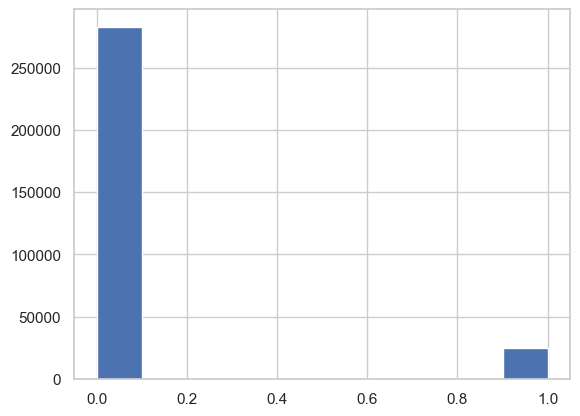

In [82]:
fig, ax = plt.subplots()

ax.hist(application_train['TARGET'])
plt.show()

We observe that this is an imbalanced class. A lot more loans have been reapaid con time than loans that were not repaid.

## Missing values

In [83]:
def missing_values_table(df):
    """
    Takes the dataframe and display missing values count and ratio
    """
    # Total missing values
    mis_val = df.isnull().sum()

    # Ratio of missing values
    mis_val_ratio = (df.isnull().sum() / len(df)) * 100

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_ratio], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by ratio of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [84]:
missing_values = missing_values_table(application_train)
missing_values.head(50)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [149]:
# get a list of columns with more than 50% missing values
missing_columns = list(missing_values[missing_values['% of Total Values'] > 50].index)
len(missing_columns)

41

## Columns type

In [85]:
# Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

### Categorical variables

In [86]:
# Number of unique classes in each object column
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Except for ORGANIZATIO_TYPE then OCCUPATION_TYPE, categorical variables have a small amount of unique values.

In [87]:
application_train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [88]:
application_train.loc[application_train['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,13.0,1,1,1,1,1,0,NaN,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,NaN,0.295998,0.461482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,NaN,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,NaN,0.709205,0.310818,0.0165,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0233,NaN,0.0115,NaN,0.0000,0.0168,0.0382,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0238,NaN,0.0120,NaN,0.0000,0.0167,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0237,NaN,0.0117,NaN,0.000,NaN,block of flats,0.0090,"Stone, brick",No,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,NaN,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.404970,0.659185,0.076984,0.0773,0.1353,0.9921,0.8912,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0630,0.0621,0.0000,NaN,0.0788,0.1404,0.9921,0.8955,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0689,0.0647,0.0000,NaN,0.0781,0.1353,0.9921,0.8927,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0641,0.0632,0.0000,NaN,reg oper spec account,block of flats,0.076

In [89]:
# drop rows with XNA
application_train = application_train[application_train['CODE_GENDER'] != 'XNA']

In [90]:
application_train['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [91]:
application_train['EMERGENCYSTATE_MODE'].value_counts()

EMERGENCYSTATE_MODE
No     159425
Yes      2328
Name: count, dtype: int64

In [92]:
application_description['Special'].unique()

array([nan, 'normalized ', 'time only relative to the application',
       'rounded', 'normalized'], dtype=object)

### Quantitative variables

In [93]:
quantitative_vars = application_train.select_dtypes(exclude='object').columns

In [94]:
# Display the first 5 rows of the quantitative variables
application_train[quantitative_vars].head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Outliers

In [95]:
not_flag_feature = [col for col in quantitative_vars if 'FLAG' not in col]
application_train[not_flag_feature].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307507.000000,307507.00000,307507.000000,3.075070e+05,3.075070e+05,307495.000000,3.072290e+05,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,104580.000000,307505.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,134131.000000,3.068470e+05,246542.000000,151447.000000,127565.000000,157501.000000,103021.000000,92645.000000,143617.000000,152680.000000,154488.000000,98867.000000,124919.000000,97310.000000,153158.000000,93995.000000,137827.000000,151447.000000,127565.000000,157501.000000,103021.000000,92645.000000,143617.000000,152680.000000,154488.000000,98867.000000,124919.000000,97310.000000,153158.000000,93995.000000,137827.000000,151447.000000,127565.000000,157501.000000,103021.000000,92645.000000,143617.000000,152680.000000,154488.000000,98867.000000,124919.000000,97310.000000,153158.000000,93995.000000,137827.000000,159077.000000,306486.000000,306486.000000,306486.000000,306486.000000,307506.000000,265988.000000,265988.000000,265988.000000,265988.000000,265988.000000,265988.000000
mean,278181.527256,0.08073,0.417047,1.687977e+05,5.990286e+05,27108.666786,5.383977e+05,0.020868,-16037.027271,63815.929208,-4986.131376,-2994.201670,12.061121,2.152658,2.052461,2.031518,12.063394,0.015144,0.050770,0.040659,0.078174,0.230457,0.179557,0.502129,5.143918e-01,0.510856,0.117442,0.088443,0.977735,0.752472,0.044621,0.078943,0.149726,0.226284,0.231897,0.066334,0.100776,0.107400,0.008809,0.028358,0.114232,0.087543,0.977065,0.759637,0.042554,0.074491,0.145194,0.222317,0.228061,0.064958,0.105646,0.105976,0.008077,0.027023,0.117851,0.087955,0.977752,0.755746,0.044596,0.078079,0.149214,0.225899,0.231628,0.067169,0.101956,0.108608,0.008651,0.028236,0.102548,1.422209,0.143406,1.405255,0.100034,-962.860546,0.006403,0.007000,0.034362,0.267388,0.265474,1.899950
std,102790.132982,0.27242,0.722119,2.371246e+05,4.024926e+05,14493.798379,3.694472e+05,0.013831,4363.982424,141276.472519,3522.883030,1509.454566,11.944919,0.910680,0.509034,0.502737,3.265835,0.122127,0.219527,0.197500,0.268445,0.421126,0.383819,0.211063,1.910603e-01,0.194843,0.108241,0.082439,0.059224,0.113279,0.076036,0.134577,0.100050,0.144641,0.161380,0.081184,0.092577,0.110565,0.047732,0.069524,0.107937,0.084308,0.064576,0.110110,0.074445,0.132257,0.100978,0.143710,0.161160,0.081751,0.097881,0.111846,0.046277,0.070254,0.109076,0.082179,0.059898,0.112066,0.076145,0.134468,0.100369,0.145067,0.161934,0.082

### Days related variables

#### Age

In [96]:
(application_train['DAYS_BIRTH'] / -365).describe()

count    307507.000000
mean         43.937061
std          11.956116
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

#### Unemployement

In [97]:
application_train['DAYS_EMPLOYED'] .describe()

count    307507.000000
mean      63815.929208
std      141276.472519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

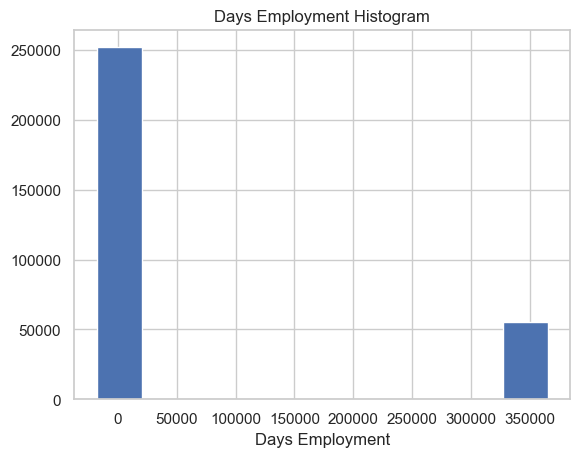

In [98]:
fig, ax = plt.subplots()

ax.hist(application_train['DAYS_EMPLOYED'])
ax.set_title('Days Employment Histogram')
ax.set_xlabel('Days Employment')
plt.show()

In [99]:
# Subset the extreme values and see if the target is different
anom = application_train[application_train['DAYS_EMPLOYED'] == 365243]
non_anom = application_train[application_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


How to correct these outliers ? Since we're missing business information on this, the safest way to deal with it is to replace with NaN and proceed to an imputation before the predictive model. Here, these outliers have the same value. Is there a link between all these rows? We'll keep a track of this information by adding a variable indicating wether or not this value was normal or not.

/var/folders/5n/5_6qtt550_3dxz3f8y6wwjww0000gn/T/ipykernel_74709/1687167807.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)


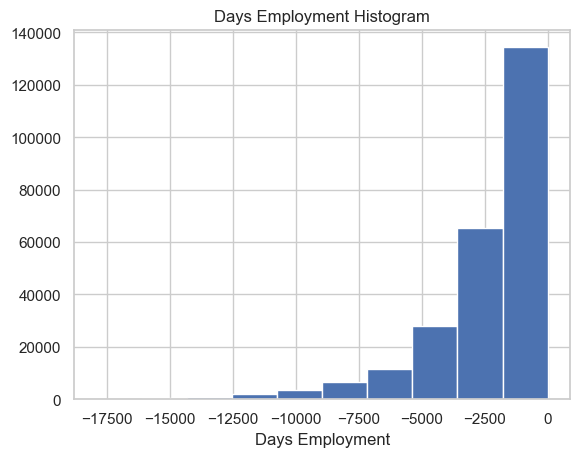

In [100]:
# Create an anomalous flag column
application_train['DAYS_EMPLOYED_ANOM'] = application_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
application_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

fig, ax = plt.subplots()
ax.hist(application_train['DAYS_EMPLOYED'])
ax.set_title('Days Employment Histogram')
ax.set_xlabel('Days Employment')

plt.show()

In [101]:
application_train[quantitative_vars].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307507.000000,307507.00000,307507.000000,3.075070e+05,3.075070e+05,307495.000000,3.072290e+05,307507.000000,307507.000000,252133.000000,307507.000000,307507.000000,104580.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307505.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,134131.000000,3.068470e+05,246542.000000,151447.000000,127565.000000,157501.000000,103021.000000,92645.000000,143617.000000,152680.000000,154488.000000,98867.000000,124919.000000,97310.000000,153158.000000,93995.000000,137827.000000,151447.000000,127565.000000,157501.000000,103021.000000,92645.000000,143617.000000,152680.000000,154488.000000,98867.000000,124919.000000,97310.000000,153158.000000,93995.000000,137827.000000,151447.000000,127565.000000,157501.000000,103021.000000,92645.000000,143617.000000,152680.000000,154488.000000,98867.000000,124919.000000,97310.000000,153158.000000,93995.000000,137827.000000,159077.000000,306486.000000,306486.000000,306486.000000,306486.000000,307506.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.00000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,265988.000000,265988.000000,265988.000000,265988.000000,265988.000000,265988.000000
mean,278181.527256,0.08073,0.417047,1.687977e+05,5.990286e+05,27108.666786,5.383977e+05,0.020868,-16037.027271,-2384.142254,-4986.131376,-2994.201670,12.061121,0.999997,0.819887,0.199358,0.998133,0.281057,0.056721,2.152658,2.052461,2.031518,12.063394,0.015144,0.050770,0.040659,0.078174,0.230457,0.179557,0.502129,5.143918e-01,0.510856,0.117442,0.088443,0.977735,0.752472,0.044621,0.078943,0.149726,0.226284,0.231897,0.066334,0.100776,0.107400,0.008809,0.028358,0.114232,0.087543,0.977065,0.759637,0.042554,0.074491,0.145194,0.222317,0.228061,0.064958,0.105646,0.105976,0.008077,0.027023,0.117851,0.087955,0.97

## Correlations with target

In [102]:
correlations = application_train[quantitative_vars].corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032261
LIVE_CITY_NOT_WORK_CITY        0.032517
OWN_CAR_AGE                    0.037611
DAYS_REGISTRATION              0.041976
FLAG_DOCUMENT_3                0.044341
REG_CITY_NOT_LIVE_CITY         0.044394
FLAG_EMP_PHONE                 0.045984
REG_CITY_NOT_WORK_CITY         0.050992
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055219
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060895
DAYS_EMPLOYED                  0.074957
DAYS_BIRTH                     0.078242
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178926
EXT_SOURCE_2                 -0.160471
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG                -0.044009
FLOORSMAX_MEDI               -0.043773
FLOORSMAX_MODE               -0.043231
AMT_GOODS_PRICE              -0.039647
REGION_POPULATION_RELATIVE   -0.037225


In [150]:
# get absolute value of correlations
correlations_abs = correlations.abs().sort_values(ascending=False)
correlations_abs.tail(50)

COMMONAREA_AVG                  0.018551
ENTRANCES_MODE                  0.017390
COMMONAREA_MODE                 0.016342
NONLIVINGAREA_AVG               0.013580
NONLIVINGAREA_MEDI              0.013338
AMT_ANNUITY                     0.012818
NONLIVINGAREA_MODE              0.012712
AMT_REQ_CREDIT_BUREAU_MON       0.012460
FLAG_DOCUMENT_16                0.011615
FLAG_DOCUMENT_13                0.011583
LANDAREA_MEDI                   0.011258
LANDAREA_AVG                    0.010887
LANDAREA_MODE                   0.010176
YEARS_BEGINEXPLUATATION_MEDI    0.009993
YEARS_BEGINEXPLUATATION_AVG     0.009727
FLAG_DOCUMENT_14                0.009464
CNT_FAM_MEMBERS                 0.009310
OBS_30_CNT_SOCIAL_CIRCLE        0.009136
YEARS_BEGINEXPLUATATION_MODE    0.009036
OBS_60_CNT_SOCIAL_CIRCLE        0.009027
FLAG_DOCUMENT_8                 0.008042
FLAG_DOCUMENT_18                0.007953
REG_REGION_NOT_WORK_REGION      0.006941
FLAG_DOCUMENT_15                0.006536
REG_REGION_NOT_L

In [152]:
# get filter missing_columns list and keep only if correlation is greater than 0.01
for corr in correlations_abs:
    if corr > 0.01 and correlations[correlations.abs() == corr].index[0] in missing_columns:
        missing_columns.remove(correlations[correlations.abs() == corr].index[0])

len(missing_columns)

6

In [104]:
test_features = [
    "EXT_SOURCE_3",
    "EXT_SOURCE_2",
    "EXT_SOURCE_1",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "NAME_CONTRACT_TYPE",
    "FONDKAPREMONT_MODE",
]

### The age

The age seems to me the most correlated variable. It is expressed in days and is negative. For better understanding, let's take the absolute value.

In [105]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

np.float64(-0.07824216003619376)

The trend of repaying a loans grows with the client age. 

Let's understand the repartition of clients age in ur dataset

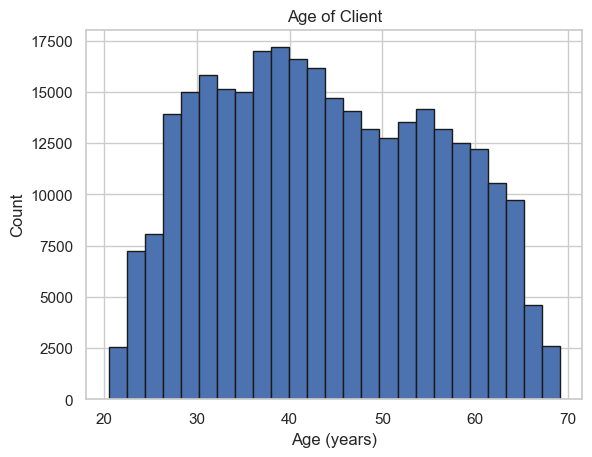

In [106]:
# set seaborn grid style
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots()

ax.hist(application_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)

ax.set_title('Age of Client')
ax.set_xlabel('Age (years)')
ax.set_ylabel('Count')

plt.show()

No outliers and ages are in a reasonable range.

Using KDE to visualie the effect of the age on the target.

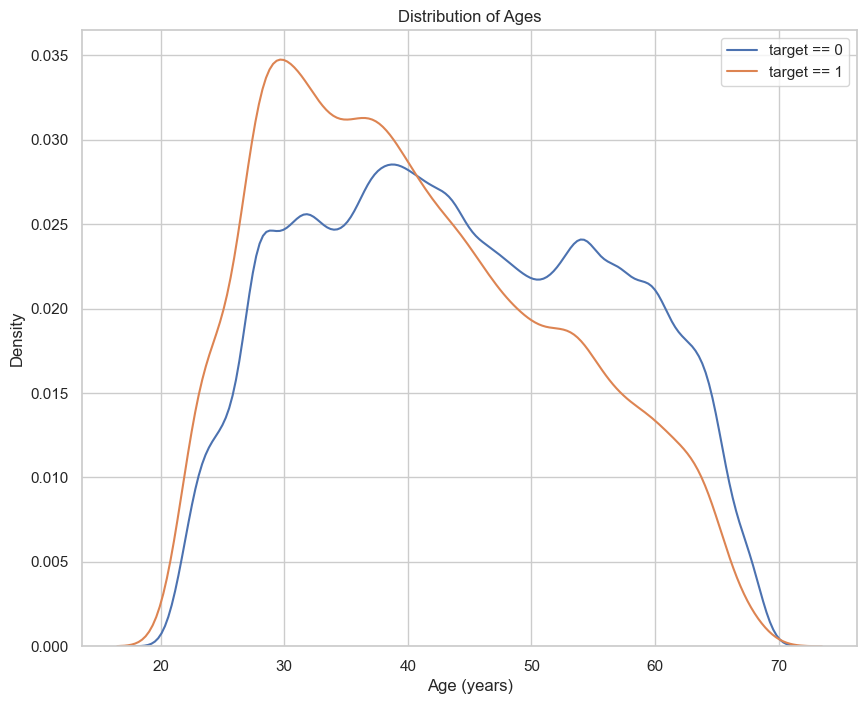

In [107]:
# Kernel density estimation
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Ages')

plt.show()

Even though the correlation coefficient is low, we notice that the curve is skewed toward the younger end of the range for target == 1.

Let's understand the the average failure to repay a loan by age brackets.

In [108]:
# Age information into a separate dataframe
age_data = application_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Cut the age into bins of 5 years each
age_data['YEARS_BINNED'] = pd.cut(age_data['DAYS_BIRTH'] / 365, bins = np.linspace(20, 70, num = 11))
age_data.head(10)

/var/folders/5n/5_6qtt550_3dxz3f8y6wwjww0000gn/T/ipykernel_74709/1512388715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
/var/folders/5n/5_6qtt550_3dxz3f8y6wwjww0000gn/T/ipykernel_74709/1512388715.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['DAYS_BIRTH'] / 365, bins = np.linspace(20, 70, num = 11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [109]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

/var/folders/5n/5_6qtt550_3dxz3f8y6wwjww0000gn/T/ipykernel_74709/1757995694.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups  = age_data.groupby('YEARS_BINNED').mean()


,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111442,10155.219690,27.822520
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089416,13707.908041,37.555912
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055316,20984.285455,57.491193
"(60.0, 65.0]",0.052737,22780.547460,62.412459


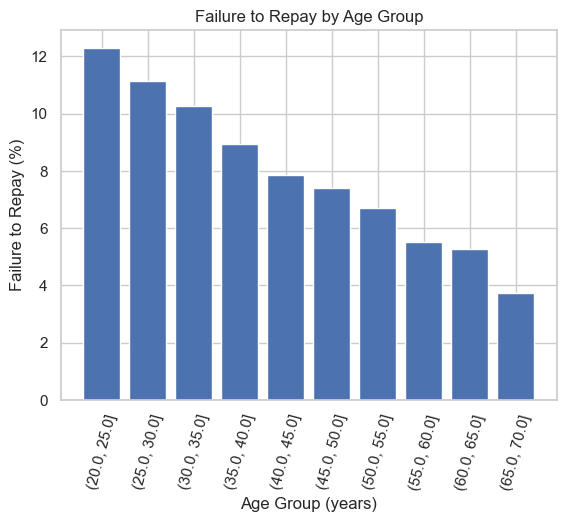

In [110]:
fig, ax = plt.subplots()

ax.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

ax.set_title('Failure to Repay by Age Group')
ax.set_xlabel('Age Group (years)')
ax.set_ylabel('Failure to Repay (%)')
# rotate x ticks
plt.xticks(rotation = 75)

plt.show()

We can clearly observe the trend that youngers are more likely to not repay their loan

### External ressources

External csources are the most negavely correlated to the target. What are those ?

In [111]:
# According to the documentation
application_description[application_description['Row'].isin(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])][["Row", "Description", "Special"]]

,Row,Description,Special
44,EXT_SOURCE_1,Normalized score from external data source,normalized
45,EXT_SOURCE_2,Normalized score from external data source,normalized
46,EXT_SOURCE_3,Normalized score from external data source,normalized


Doesn't give much information. How do they play around the target and other correlated variable ?

Text(0.5, 1.0, 'Correlation Heatmap')

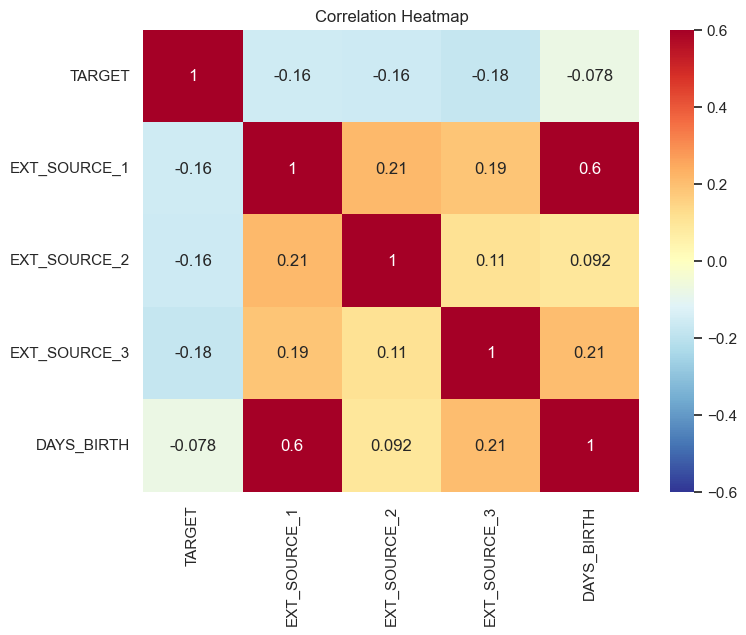

In [112]:
# get correlation of the EXT_SOURCE features with the target and plot them
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.6, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

# Create a subset

Dataset is quite big and slowing our tests. We decided to get a subset of it and make sure to respect the class proportion

In [326]:
from sklearn.model_selection import train_test_split


# Subset the data using stratified sampling
subset, _ = train_test_split(
    application_train,
    train_size=0.5,
    stratify=application_train['TARGET'],
    random_state=42,
)

print(f" Subset : {subset.shape}")

# Split the subset into two samples (train/test or sample 1/sample 2)
sample_1, sample_2 = train_test_split(
    subset, test_size=0.5, stratify=subset["TARGET"], random_state=42
)

print(f" Sample1 : {sample_1.shape}")
print(f" Sample2 : {sample_2.shape}")

 Subset : (153753, 123)
 Sample1 : (76876, 123)
 Sample2 : (76877, 123)


# Test on few features

In [127]:
X_subset = sample_1.drop(columns=["TARGET", "SK_ID_CURR"])
y_subset = sample_1["TARGET"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_subset, y_subset, test_size=0.3, stratify=y_subset, random_state=42
)
X_train1 = X_train1[test_features]
X_test1 = X_test1[test_features]
X_train1.shape

(64576, 7)

In [128]:
X_train1.isna().sum()

EXT_SOURCE_3          12637
EXT_SOURCE_2            147
EXT_SOURCE_1          36529
DAYS_BIRTH                0
DAYS_EMPLOYED         11688
NAME_CONTRACT_TYPE        0
FONDKAPREMONT_MODE    44200
dtype: int64

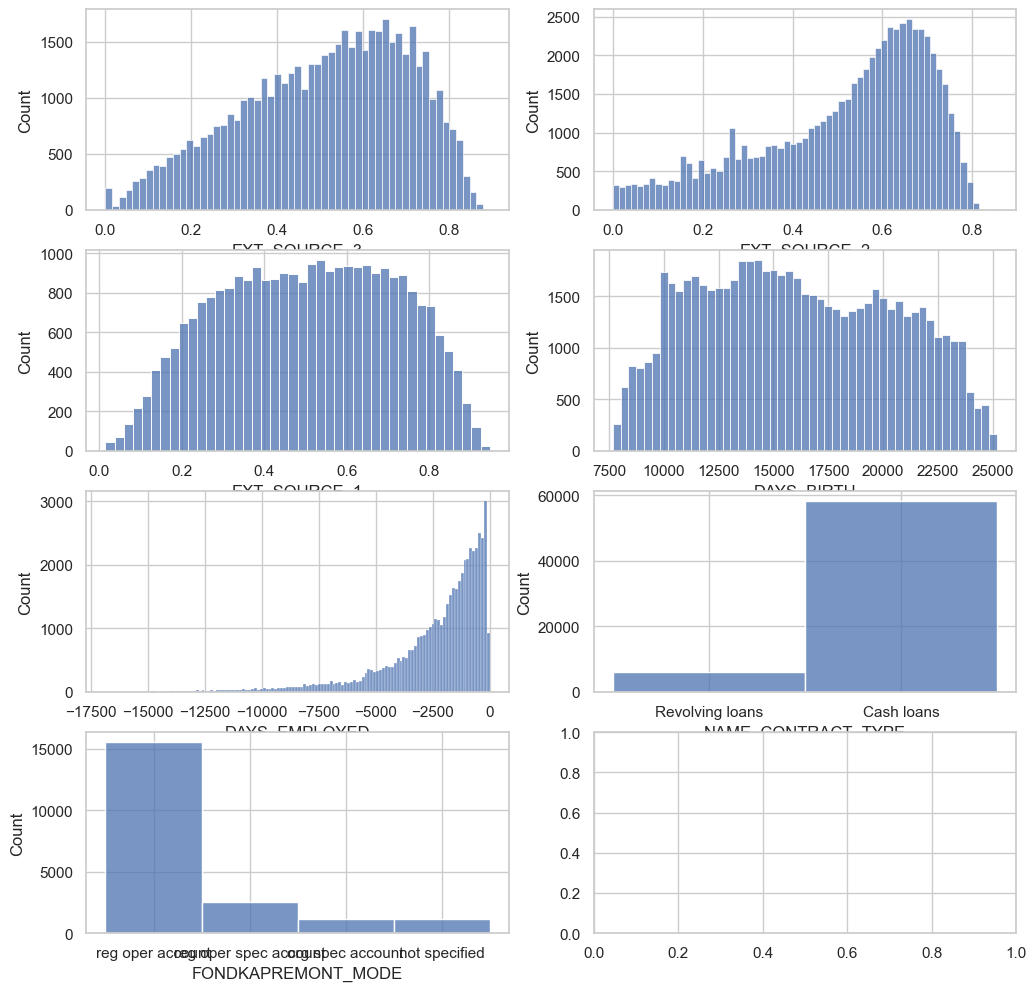

In [129]:
# plot distribution of quantitative variables
fig, ax = plt.subplots(4, 2, figsize=(12, 12))

for i, col in enumerate(X_train1.columns):
    sns.histplot(X_train1[col], ax=ax[i // 2, i % 2])

plt.show()

In [130]:
# Use iterative imputer on quantitative variables
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=42)
imputed_data = imputer.fit_transform(X_train1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']])

X_train1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']] = imputed_data

imputed_data = imputer.fit_transform(
    X_test1[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]]
)
X_test1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']] = imputed_data

X_train1.isna().sum()


EXT_SOURCE_3              0
EXT_SOURCE_2              0
EXT_SOURCE_1              0
DAYS_BIRTH                0
DAYS_EMPLOYED         11688
NAME_CONTRACT_TYPE        0
FONDKAPREMONT_MODE    44200
dtype: int64

In [131]:
# simple imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)

imputed_data = imputer.fit_transform(X_train1[["DAYS_EMPLOYED"]])
X_train1["DAYS_EMPLOYED"] = imputed_data

imputed_data = imputer.fit_transform(X_test1[['DAYS_EMPLOYED']])
X_test1['DAYS_EMPLOYED'] = imputed_data

In [132]:
imputer = SimpleImputer(strategy='most_frequent')

imputed_data = imputer.fit_transform(X_train1[['NAME_CONTRACT_TYPE', 'FONDKAPREMONT_MODE']])
X_train1[['NAME_CONTRACT_TYPE', 'FONDKAPREMONT_MODE']] = imputed_data

imputed_data = imputer.fit_transform(
    X_test1[["NAME_CONTRACT_TYPE", "FONDKAPREMONT_MODE"]]
)
X_test1[["NAME_CONTRACT_TYPE", "FONDKAPREMONT_MODE"]] = imputed_data

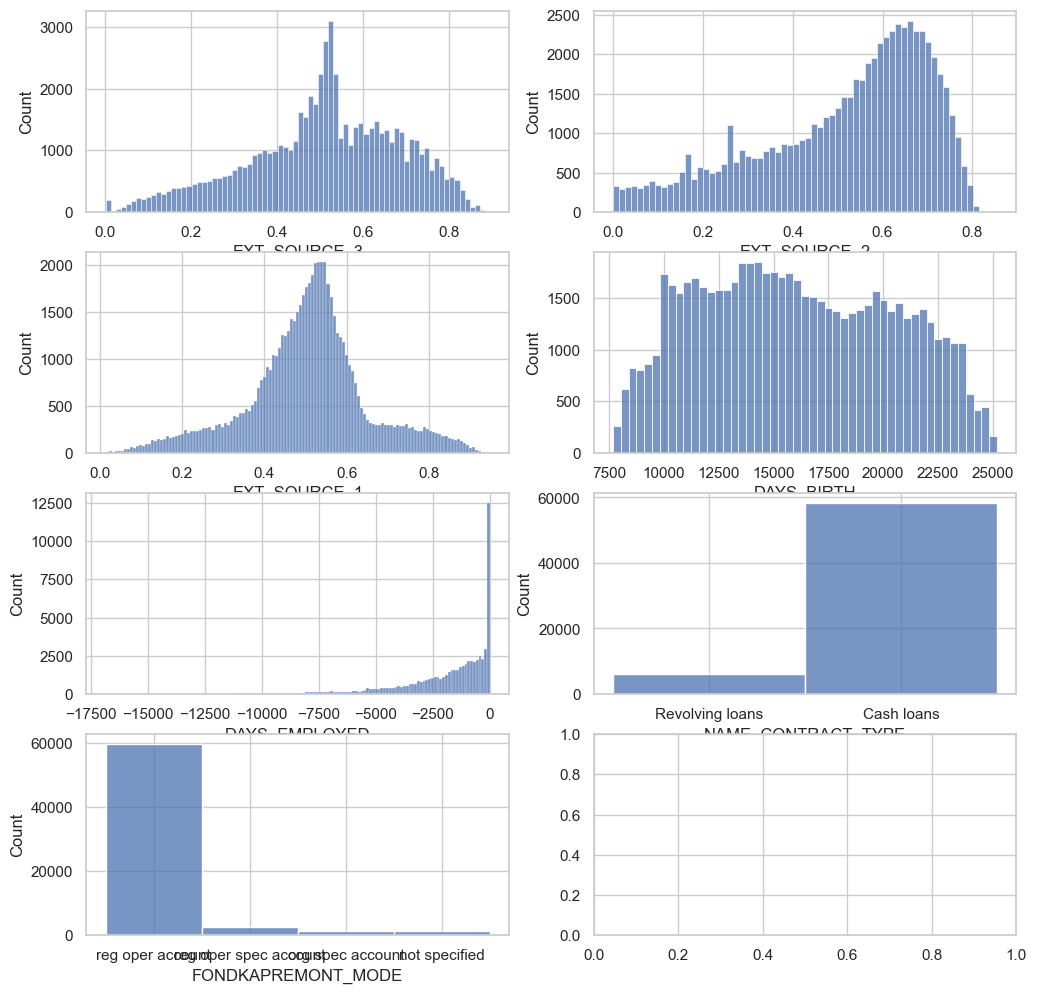

In [133]:
# Plot histograms
fig, ax = plt.subplots(4, 2, figsize=(12, 12))
for i, col in enumerate(X_train1.columns):
    sns.histplot(X_train1[col], ax=ax[i // 2, i % 2])

plt.show()


In [134]:
# Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X_train1[['NAME_CONTRACT_TYPE']] = ordinal_encoder.fit_transform(X_train1[['NAME_CONTRACT_TYPE']])
X_test1[['NAME_CONTRACT_TYPE']] = ordinal_encoder.transform(X_test1[['NAME_CONTRACT_TYPE']])

X_train1.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,DAYS_EMPLOYED,NAME_CONTRACT_TYPE,FONDKAPREMONT_MODE
302791,0.626304,0.535640,0.535489,14619,-234.0,1.0,reg oper account
135898,0.771362,0.756438,0.628708,23454,0.0,0.0,reg oper account
230915,0.584990,0.598291,0.543868,14665,-631.0,1.0,reg oper account
53089,0.337673,0.457865,0.620267,14916,-6536.0,0.0,reg oper account
57516,0.667458,0.563736,0.413775,19725,-98.0,0.0,reg oper account


In [138]:
# onehot encoding
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# Apply one hot endorer on FONTKAPREMONT_MODE
encoded_data = onehot_encoder.fit_transform(X_train1[['FONDKAPREMONT_MODE']]).toarray()
feature_names = onehot_encoder.get_feature_names_out()
encoded_data = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(), index=X_train1.index)

X_train1 = pd.concat([X_train1, encoded_data], axis=1)
X_train1.drop(columns=['FONDKAPREMONT_MODE'], inplace=True)

encoded_data = onehot_encoder.transform(X_test1[['FONDKAPREMONT_MODE']]).toarray()
encoded_data = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(), index=X_test1.index)
X_test1 = pd.concat([X_test1, encoded_data], axis=1)
X_test1.drop(columns=['FONDKAPREMONT_MODE'], inplace=True)


X_train1.head()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,DAYS_EMPLOYED,NAME_CONTRACT_TYPE,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account
302791,0.626304,0.535640,0.535489,14619,-234.0,1.0,0.0,0.0,1.0,0.0
135898,0.771362,0.756438,0.628708,23454,0.0,0.0,0.0,0.0,1.0,0.0
230915,0.584990,0.598291,0.543868,14665,-631.0,1.0,0.0,0.0,1.0,0.0
53089,0.337673,0.457865,0.620267,14916,-6536.0,0.0,0.0,0.0,1.0,0.0
57516,0.667458,0.563736,0.413775,19725,-98.0,0.0,0.0,0.0,1.0,0.0


In [139]:
feature_names

array(['FONDKAPREMONT_MODE_not specified',
       'FONDKAPREMONT_MODE_org spec account',
       'FONDKAPREMONT_MODE_reg oper account',
       'FONDKAPREMONT_MODE_reg oper spec account'], dtype=object)

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

<Axes: ylabel='Feature'>

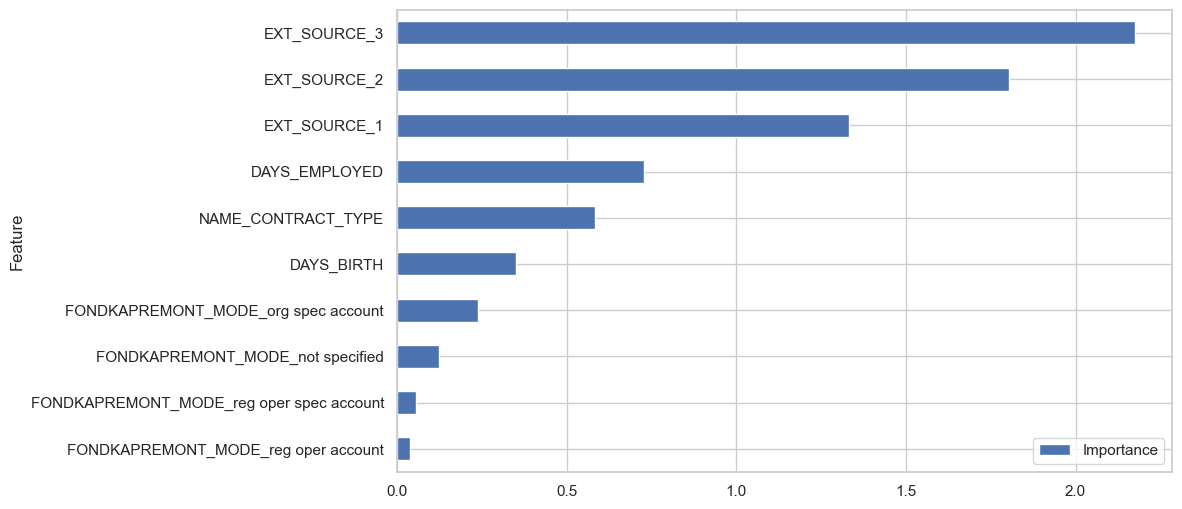

In [140]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train1_scaled, y_train1)

coef = lg.coef_[0]

feature_importance = pd.DataFrame(
    {"Feature": X_train1.columns, "Importance": np.abs(coef)}
)
feature_importance = feature_importance.sort_values("Importance", ascending=True)
feature_importance.plot(x="Feature", y="Importance", kind="barh", figsize=(10, 6))

In [145]:
# evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = lg.predict(X_test1_scaled)

print(accuracy_score(y_test1, y_pred), recall_score(y_test1, y_pred), precision_score(y_test1, y_pred))


0.919244110420581 0.0013428827215756492 0.42857142857142855


In [146]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

rfc.fit(X_train1_scaled, y_train1)
y_pred = rfc.predict(X_test1_scaled)

print(accuracy_score(y_test1, y_pred), recall_score(y_test1, y_pred), precision_score(y_test1, y_pred))

0.9190995808642868 0.010295434198746643 0.45098039215686275


In [147]:
# LGBM
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
lgbm.fit(X_train1_scaled, y_train1)
y_pred = lgbm.predict(X_test1_scaled)

print(accuracy_score(y_test1, y_pred), recall_score(y_test1, y_pred), precision_score(y_test1, y_pred))

[LightGBM] [Info] Number of positive: 5213, number of negative: 59363
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1285
[LightGBM] [Info] Number of data points in the train set: 64576, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
0.7035698800404683 0.6271262309758281 0.15971272229822162


# Preprocessing

In [327]:
def split_cat_col(X_subset):
    """
    Process the categorical columns
    """
    # Create lists to hold columns that will be one-hot encoded and label encoded
    bimodal_cols = []
    multimodal_cols = []
    # Iterate through the columns
    for col in X_subset:
        if X_subset[col].dtype == "object":
            # If 2 or fewer unique categories
            bimodal_cols.append(col) if len(
                list(X_subset[col].unique())
            ) <= 2 else multimodal_cols.append(col)

    print("%d columns to process with a label encoder." % len(bimodal_cols))
    print(bimodal_cols)
    print("%d columns to process with a one-hot encoder." % len(multimodal_cols))
    print(multimodal_cols)

    return {"bimodal": bimodal_cols, "multimodal": multimodal_cols}

In [276]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import (
    MinMaxScaler,
    OrdinalEncoder,
    OneHotEncoder,
)

from sklearn import set_config

set_config(display="diagram")

num_imputer = Pipeline(
    steps=[
        ("imputer", IterativeImputer()),
    ]
)

ordinal_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OrdinalEncoder()),
    ]
)

one_hot_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Split the data

## All data

In [343]:
X = sample_1.drop(columns=["TARGET", "SK_ID_CURR"])
y = sample_1["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=42
)
print(X_train.shape)

(53813, 121)


# Defining metrics

In [156]:
from sklearn.metrics import roc_auc_score, make_scorer, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

def cost_score(y_true, y_pred):
    """Custom scoring method to add a cost to false negatives

    Args:
        y_true (Series): TARGET
        y_pred (Series): predicted values

    Returns:
        int: score
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # precision = 0 if tp + fp == 0 else (tp / (tp + fp))
    # Penalize false negatives by a factor of 10
    weighted_recall = tp / (tp + (10 * fn))

    return weighted_recall

# Testing simple models

In [179]:
# Create a dataframe to store the results
results = pd.DataFrame(columns=["Model", "Strategy", "Time","ROC AUC", "F1", "Precision", "Recall", "Custom"])

In [160]:
def display_results(y_test, y_pred, model, strategy, time, results=results) -> pd.DataFrame:
    """Display the results of the model
    params:
    =======
    y_test: Series
        the target values
    y_pred: Series
        the predicted values
    results:
    ========
    Dataframe: the results of the model
    """
    metrics = {
        "Model": model,
        "Strategy": strategy,
        "Time": time,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred),
        "Custom": cost_score(y_test, y_pred),
    }
    # Initialize results if it is None
    if results is None:
        results = pd.DataFrame()

    # Check if results DataFrame is empty or contains only NA values
    if results.empty or results.isna().all().all():
        results = pd.DataFrame([metrics])
    else:
        results = pd.concat([results, pd.DataFrame([metrics])], ignore_index=True)
    return results

In [164]:
from sklearn.metrics import (
    RocCurveDisplay,
    PrecisionRecallDisplay,
    precision_recall_curve,
)


def plot_metrics(y_true, y_pred, model):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred, cmap="Blues", colorbar=False, ax=axes[0]
    )
    axes[0].set_title("Confusion Matrix")
    axes[0].set_xlabel("Predicted label")
    axes[0].set_ylabel("True label")

    # Plot ROC curve
    RocCurveDisplay.from_predictions(y_true, y_pred, name=model, ax=axes[1])
    axes[1].plot([0, 1], [0, 1], "r--")
    axes[1].set_title("ROC AUC curve")

    # Plot precision/recall curve
    PrecisionRecallDisplay.from_predictions(y_true, y_pred, name=model, ax=axes[2])
    axes[2].set_title("Precision/Recall Curve")

    plt.tight_layout()
    plt.show()


## Make the column transformer

In [336]:
cat_col = split_cat_col(X_train)
# the argument 'reminder' defines the processing of the columns not specified in the transformers. 'passthrough' means that they will be left unchanged, otherwise they will be dropped
col_processor = ColumnTransformer(
    transformers=[
        ("num", num_imputer, make_column_selector(dtype_include=np.number)),
        ("ordinal", ordinal_pipeline, cat_col["bimodal"]),
        ("one_hot", one_hot_pipeline, cat_col["multimodal"]),
    ],
    remainder="passthrough",
)


4 columns to process with a label encoder.
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
12 columns to process with a one-hot encoder.
['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


## DummyClassifier

We use a dummy classifier as a base model in order to compare more sophisticated models.

In [344]:
from sklearn.dummy import DummyClassifier
import time

dummy_model = DummyClassifier()
dummy_pipeline = Pipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("dummy", dummy_model)
    ]
)

start = time.time()
dummy_pipeline.fit(X_train, y_train)
dummy_y_pred = dummy_pipeline.predict(X_test)
end = time.time()

results = display_results(y_test, dummy_y_pred, "Dummy", "Most frequent", end - start)
display(results)

/Users/laetitiataddei/Desktop/code/Laeti-dev/data/P4_Credit-Scoring-Model/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Dummy,Most frequent,54.462978,0.919265,0.0,0.0,0.0,0.5,0.0


For a Dummy model using the strategy most_frequent, we can observe that 100% of the prediction are for the majority class : 0.

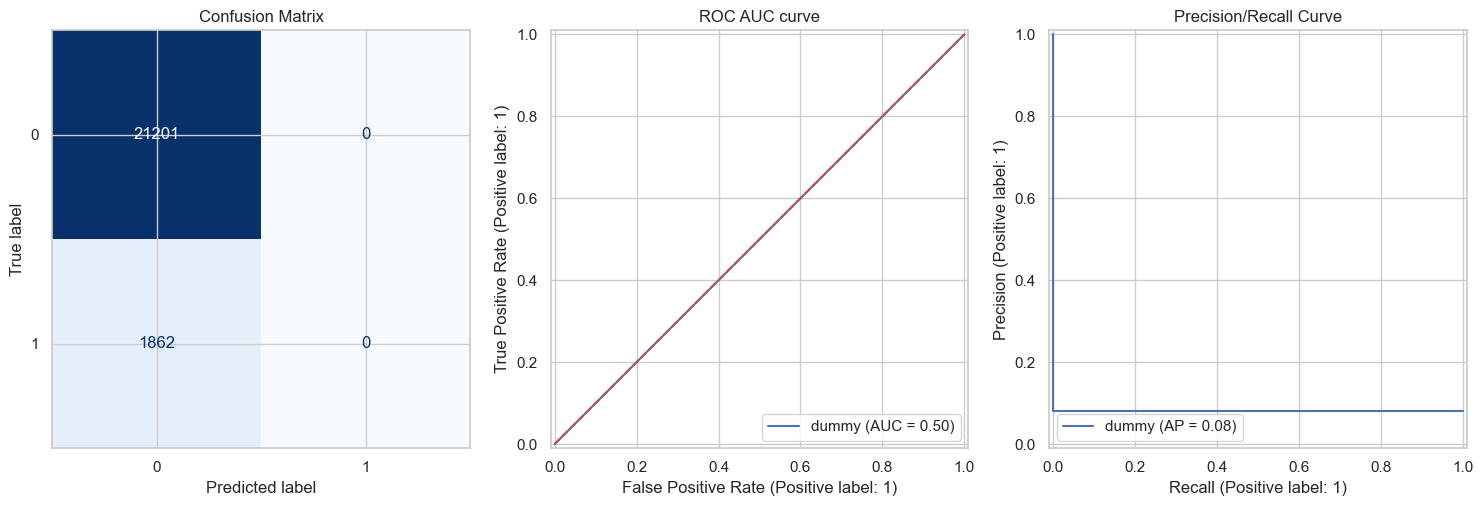

In [345]:
plot_metrics(y_test, dummy_y_pred, dummy_pipeline.steps[-1][0])

As we expect, the ROC AUC curve is a diagonal, that means that the model is as basic as predicting with 50% chance each class.

Let's observe the performance of a Logistic regression.

## Logistic Regression

In [346]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)

lg_pipeline = Pipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("logistic", logistic_model)
    ]
)

start = time.time()
lg_pipeline.fit(X_train, y_train)
# features_name
features_name = lg_pipeline.named_steps['preprocessor'].transformers_[2][1].named_steps['encoder'].get_feature_names_out()
simple_lg_coef = lg.coef_[0]

lg_y_pred = lg_pipeline.predict(X_test)
end = time.time()


results = display_results(
    y_test, lg_y_pred, "Logistic Regression", "None", end - start, results
)
display(results)

,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Dummy,Most frequent,54.462978,0.919265,0.000000,0.000000,0.000000,0.500000,0.000000
1,Logistic Regression,None,50.696452,0.919351,0.016913,0.533333,0.008593,0.503966,0.000866


In [246]:
def get_features_coef(pipeline) -> pd.DataFrame:
    new_cat_col = (
        pipeline.named_steps["preprocessor"]
        .transformers_[2][1]
        .named_steps["encoder"]
        .get_feature_names_out(cat_col["multimodal"])
    )
    num = X_train.select_dtypes(include=np.number).columns
    all_features = np.concat([num, cat_col["bimodal"], new_cat_col])

    coefs = pipeline.named_steps["logistic"].coef_.flatten()
    coef = pd.DataFrame(zip(all_features, coefs), columns=["feature", "coef"])

    coef["abs_coef"] = coef["coef"].apply(lambda x: abs(x))
    coef = coef.sort_values("abs_coef", ascending=True)

    # get a list of name of features with coef greater than 0.4
    best_features = coef[coef['abs_coef'] >= 0.4]
    best_features = best_features["feature"].unique().tolist()

    coef_top = coef.tail(50)
    # feature_importance = coef.sort_values("coef", ascending=True)
    coef_top.plot(x="feature", y="abs_coef", kind="barh", figsize=(10, 20))

    return best_features

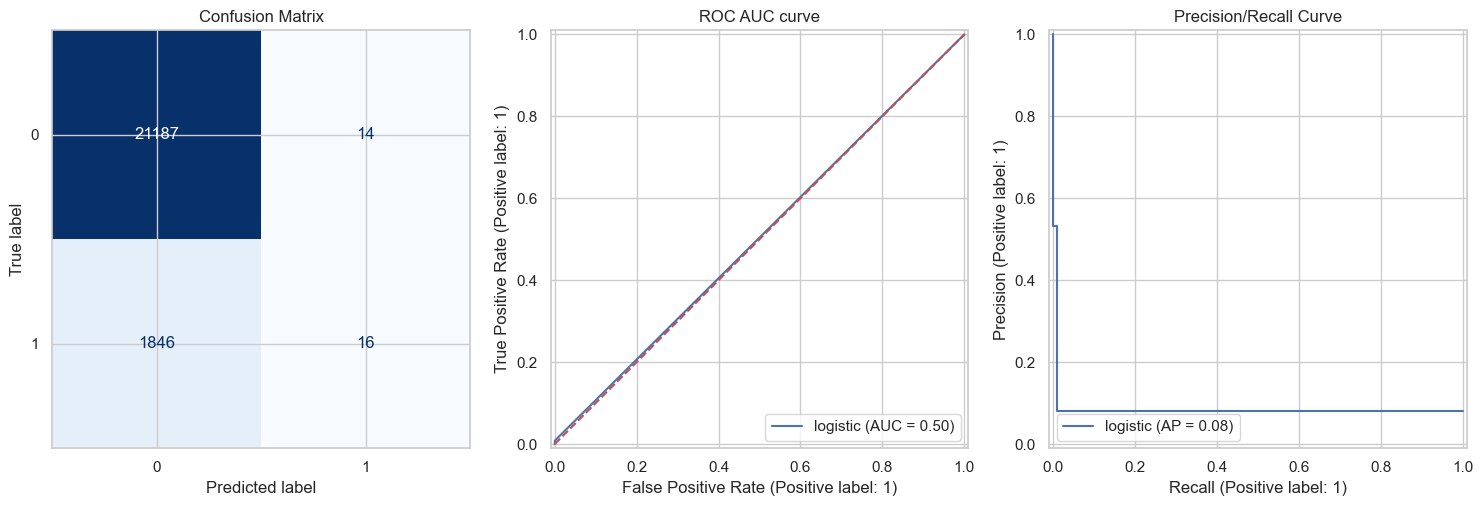

In [347]:
plot_metrics(y_test, lg_y_pred, lg_pipeline.steps[-1][0])

## Working on imbalanced dataset

In [348]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline as imbPipeline


rus = RandomUnderSampler(random_state=42, replacement=True)
ros = RandomOverSampler(random_state=42)
tl = TomekLinks(sampling_strategy="majority")
smote = SMOTE()
nm = NearMiss()

resmpling_strategies = [rus, ros, tl, smote, nm]

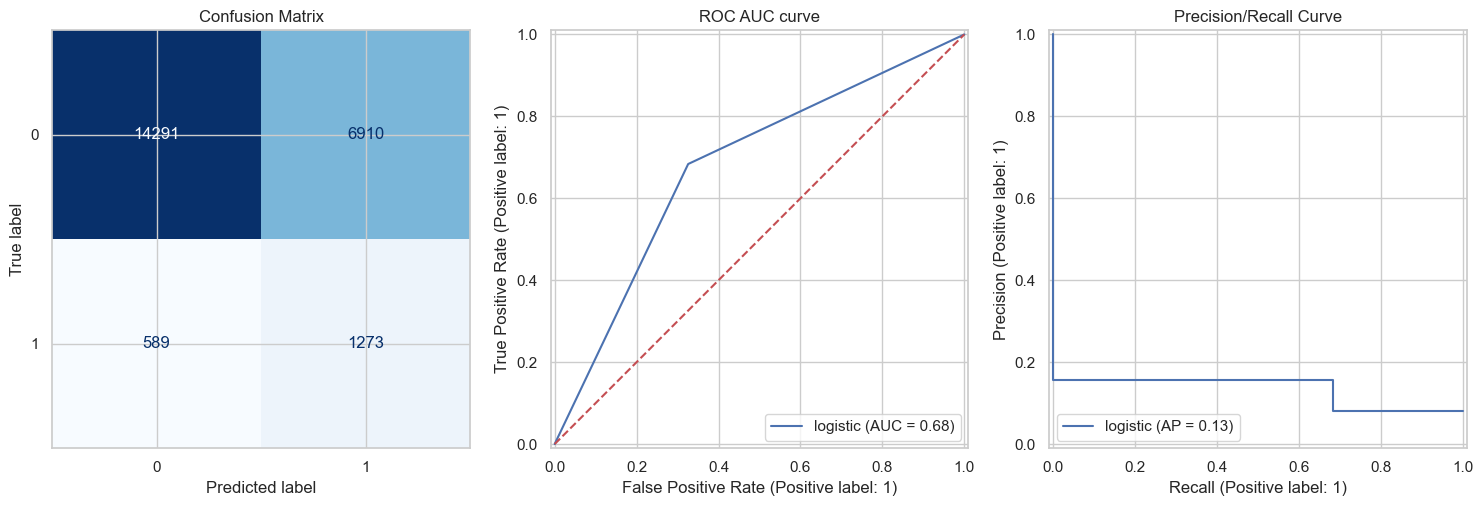

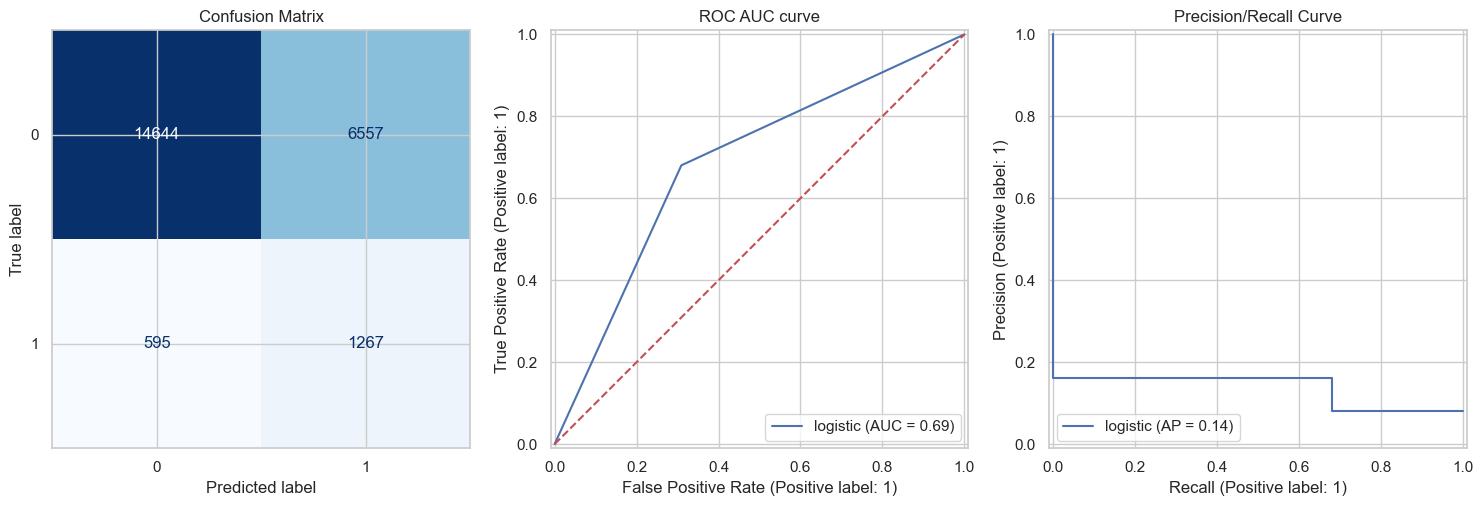

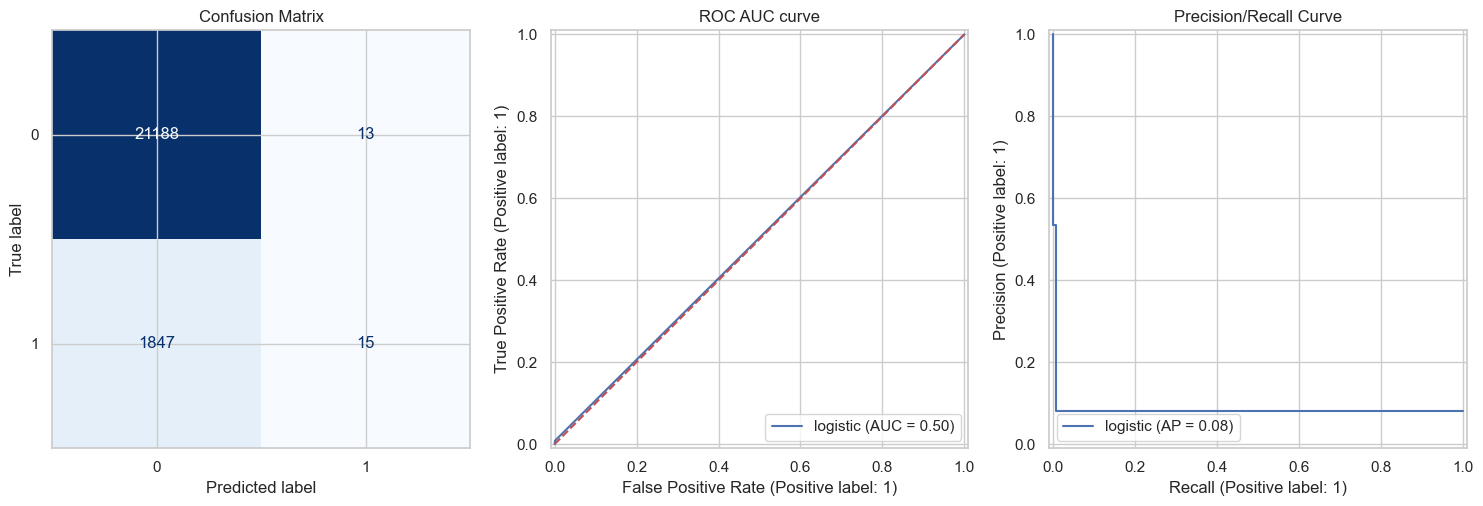

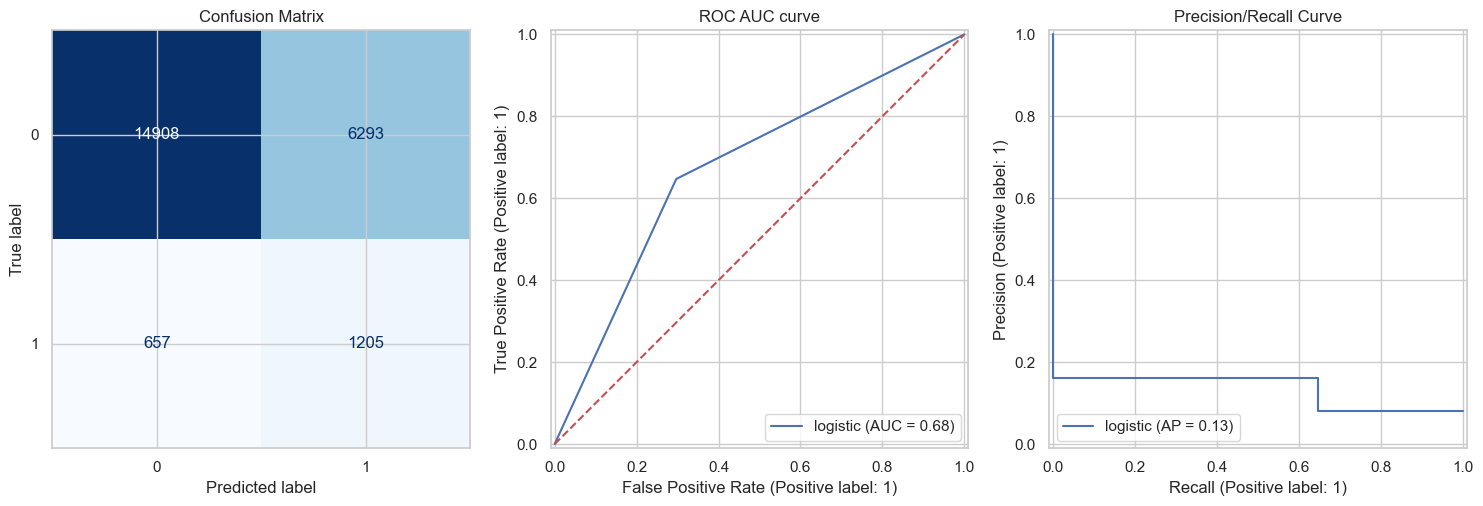

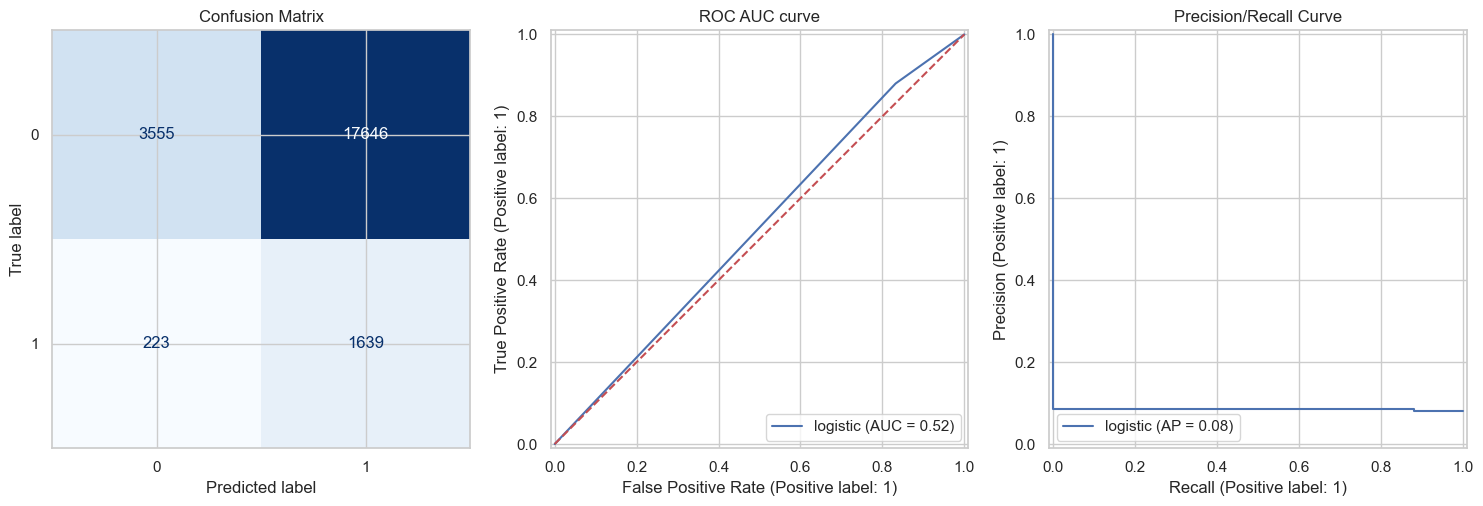

,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Dummy,Most frequent,54.462978,0.919265,0.000000,0.000000,0.000000,0.500000,0.000000
1,Logistic Regression,None,50.696452,0.919351,0.016913,0.533333,0.008593,0.503966,0.000866
2,Logistic Regression,"RandomUnderSampler(random_state=42, replacemen...",48.993112,0.674847,0.253459,0.155566,0.683673,0.678873,0.177719
3,Logistic Regression,RandomOverSampler(random_state=42),52.502221,0.689893,0.261615,0.161938,0.680451,0.685587,0.175558
4,Logistic Regression,TomekLinks(sampling_strategy='majority'),54.018584,0.919351,0.015873,0.535714,0.008056,0.503721,0.000811
5,Logistic Regression,SMOTE(),55.494757,0.698652,0.257479,0.160710,0.647154,0.675164,0.154984
6,Logistic Regression,NearMiss(),49.474345,0.225209,0.155010,0.084988,0.880236,0.523959,0.423624


In [349]:
for strategy in resmpling_strategies:
    pipeline = imbPipeline(
        steps=[
            ("preprocessor", col_processor),
            ("scaler", MinMaxScaler()),
            ("sampler", strategy),
            ("logistic", logistic_model)
        ]
    )
    start = time.time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    end = time.time()
    results = display_results(y_test, y_pred, 'Logistic Regression', pipeline.steps[2][1], end - start, results)
    plot_metrics(y_test, y_pred, pipeline.steps[-1][0])

display(results)

## Ensemble models

### Bagging technique

,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Dummy,Most frequent,54.462978,0.919265,0.000000,0.000000,0.000000,0.500000,0.000000
1,Logistic Regression,None,50.696452,0.919351,0.016913,0.533333,0.008593,0.503966,0.000866
2,Logistic Regression,"RandomUnderSampler(random_state=42, replacemen...",48.993112,0.674847,0.253459,0.155566,0.683673,0.678873,0.177719
3,Logistic Regression,RandomOverSampler(random_state=42),52.502221,0.689893,0.261615,0.161938,0.680451,0.685587,0.175558
4,Logistic Regression,TomekLinks(sampling_strategy='majority'),54.018584,0.919351,0.015873,0.535714,0.008056,0.503721,0.000811
5,Logistic Regression,SMOTE(),55.494757,0.698652,0.257479,0.160710,0.647154,0.675164,0.154984
6,Logistic Regression,NearMiss(),49.474345,0.225209,0.155010,0.084988,0.880236,0.523959,0.423624
7,RFC,SMOTE,89.626810,0.914365,0.052758,0.246637,0.029538,0.510807,0.003034


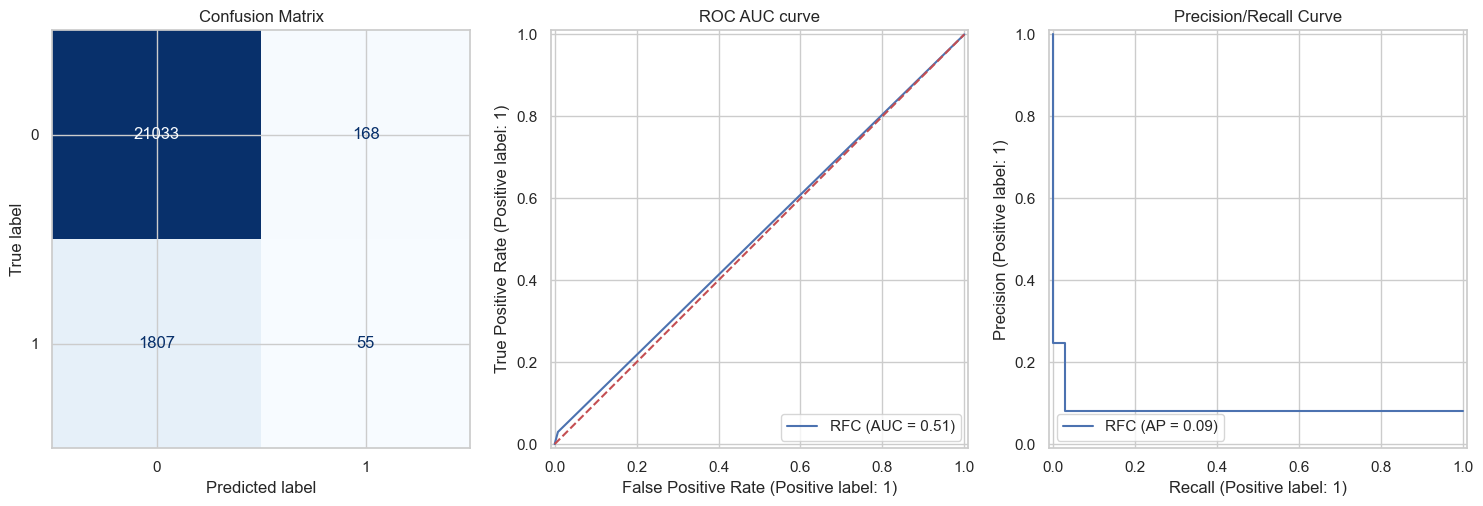

In [350]:
from sklearn.ensemble import RandomForestClassifier

pipeline = imbPipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("smote", smote),
        ("RFC", RandomForestClassifier())
    ]
)

start = time.time()
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
end = time.time()

results = display_results(y_test, y_pred, "RFC", "SMOTE", end - start, results)
display(results)
plot_metrics(y_test, y_pred, pipeline.steps[-1][0])

<Axes: ylabel='feature'>

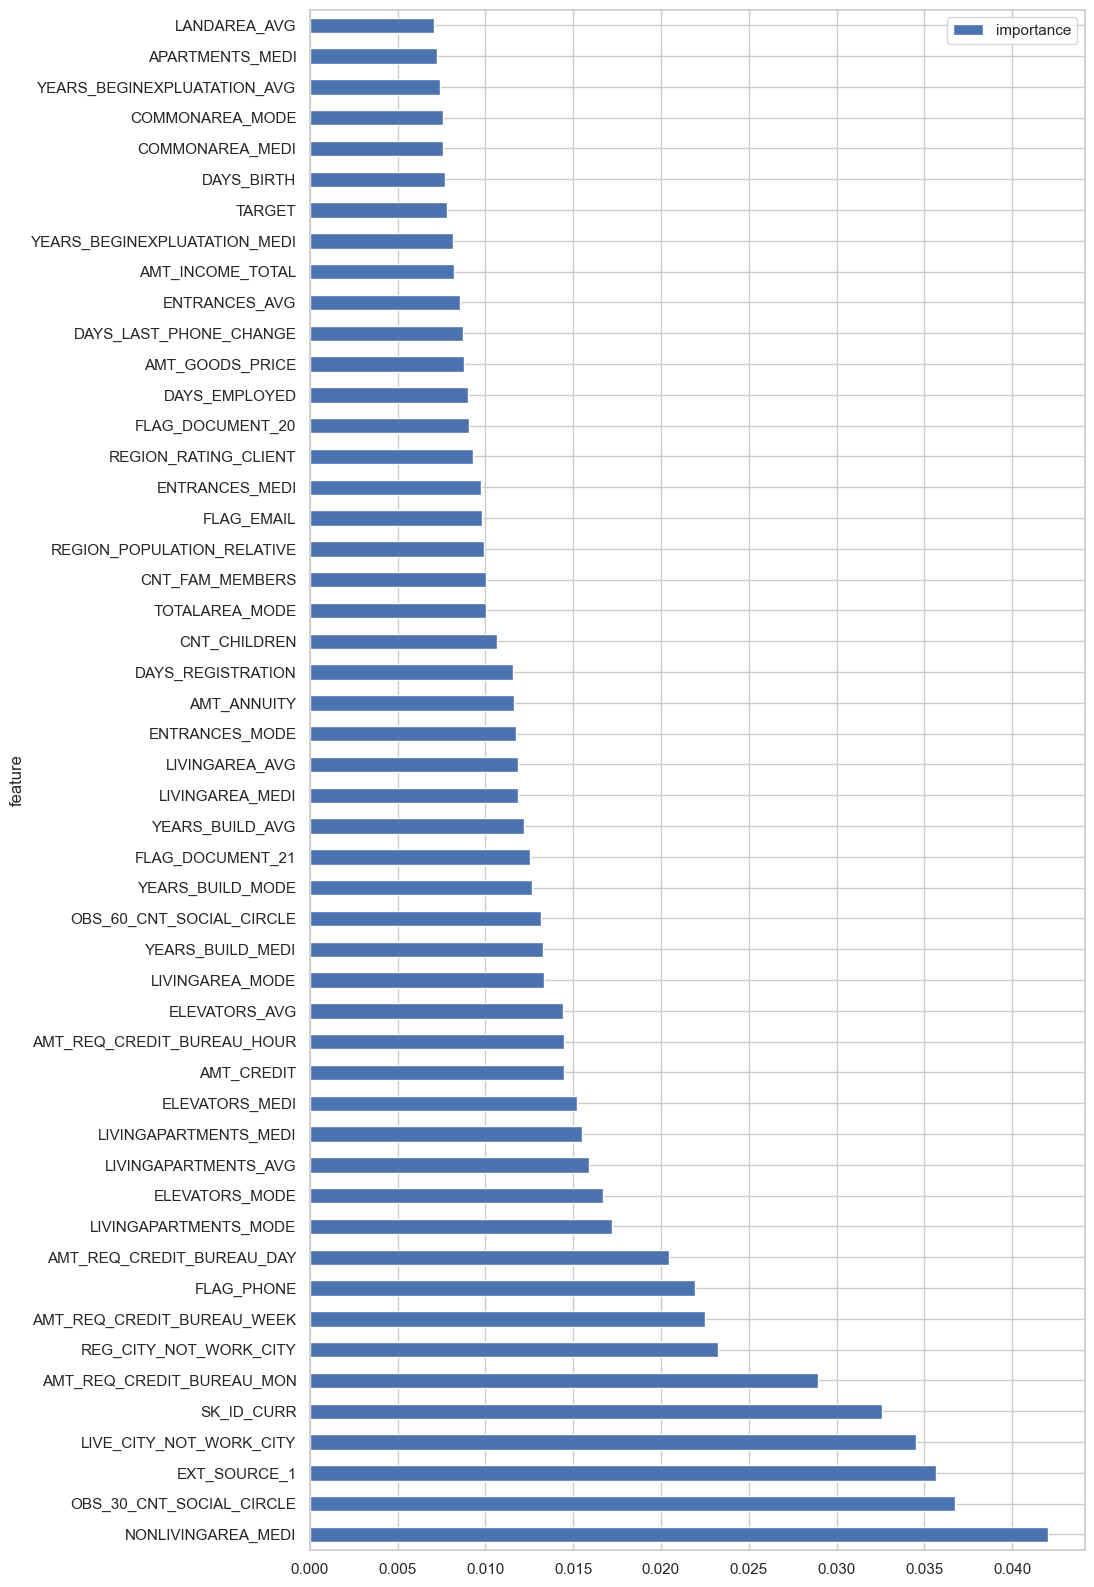

In [219]:
rfc = pipeline.named_steps['RFC']
importance = rfc.feature_importances_

new_cat_col = (
        pipeline.named_steps["preprocessor"]
        .transformers_[2][1]
        .named_steps["encoder"]
        .get_feature_names_out(cat_col["multimodal"])
    )
all_features = np.concat([quantitative_vars, cat_col["bimodal"], new_cat_col])

feature_importance = pd.DataFrame(zip(all_features, importance), columns=["feature", "importance"])

# feature_importance["abs_coef"] = feature_importance["coef"].apply(lambda x: abs(x))
feature_importance = feature_importance.sort_values("importance", ascending=False)

top_features = feature_importance.head(50)
# feature_importance = coef.sort_values("coef", ascending=True)
top_features.plot(x="feature", y="importance", kind="barh", figsize=(10, 20))

In [351]:
pipeline = Pipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("RFC", RandomForestClassifier(class_weight="balanced")),
    ]
)

start = time.time()
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
end = time.time()

results = display_results(y_test, y_pred, "RFC", "balanced", end - start, results)
display(results)

,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Dummy,Most frequent,54.462978,0.919265,0.000000,0.000000,0.000000,0.500000,0.000000
1,Logistic Regression,None,50.696452,0.919351,0.016913,0.533333,0.008593,0.503966,0.000866
2,Logistic Regression,"RandomUnderSampler(random_state=42, replacemen...",48.993112,0.674847,0.253459,0.155566,0.683673,0.678873,0.177719
3,Logistic Regression,RandomOverSampler(random_state=42),52.502221,0.689893,0.261615,0.161938,0.680451,0.685587,0.175558
4,Logistic Regression,TomekLinks(sampling_strategy='majority'),54.018584,0.919351,0.015873,0.535714,0.008056,0.503721,0.000811
5,Logistic Regression,SMOTE(),55.494757,0.698652,0.257479,0.160710,0.647154,0.675164,0.154984
6,Logistic Regression,NearMiss(),49.474345,0.225209,0.155010,0.084988,0.880236,0.523959,0.423624
7,RFC,SMOTE,89.626810,0.914365,0.052758,0.246637,0.029538,0.510807,0.003034
8,RFC,balanced,61.678976,0.919308,0.001074,1.000000,0.000537,0.500269,0.000054


### Boosting

In [352]:
from sklearn.ensemble import AdaBoostClassifier

pipeline = imbPipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("sampler", smote),
        ("AdaBoost", AdaBoostClassifier()),
    ]
)

start = time.time()
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
end = time.time()

results = display_results(y_test, y_pred, "AdaBoost", "SMOTE", end - start, results)
display(results)

/Users/laetitiataddei/Desktop/code/Laeti-dev/data/P4_Credit-Scoring-Model/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Dummy,Most frequent,54.462978,0.919265,0.000000,0.000000,0.000000,0.500000,0.000000
1,Logistic Regression,None,50.696452,0.919351,0.016913,0.533333,0.008593,0.503966,0.000866
2,Logistic Regression,"RandomUnderSampler(random_state=42, replacemen...",48.993112,0.674847,0.253459,0.155566,0.683673,0.678873,0.177719
3,Logistic Regression,RandomOverSampler(random_state=42),52.502221,0.689893,0.261615,0.161938,0.680451,0.685587,0.175558
4,Logistic Regression,TomekLinks(sampling_strategy='majority'),54.018584,0.919351,0.015873,0.535714,0.008056,0.503721,0.000811
5,Logistic Regression,SMOTE(),55.494757,0.698652,0.257479,0.160710,0.647154,0.675164,0.154984
6,Logistic Regression,NearMiss(),49.474345,0.225209,0.155010,0.084988,0.880236,0.523959,0.423624
7,RFC,SMOTE,89.626810,0.914365,0.052758,0.246637,0.029538,0.510807,0.003034
8,RFC,balanced,61.678976,0.919308,0.001074,1.000000,0.000537,0.500269,0.000054
9,AdaBoost,SMOTE,83.579211,0.844513,0.188321,0.162754,0.223416,0.561239,0.027965


In [353]:
import xgboost as xgb
from xgboost import XGBClassifier

# To balance the dataset, we will use the scale_pos_weight parameter.
# If we set it to a value greater than 1, the model will give more importance to the positive class,
# as it will be penalized more for misclassifying this class.
# To set its value, we'll divide the number of negative samples by the number of positive ones.
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

pipeline = Pipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("XGB", XGBClassifier(scale_pos_weight=ratio)),
    ]
)

start = time.time()
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
end = time.time()

results = display_results(y_test, y_pred, "XGB", "scale_pos_weight", end - start, results)
display(results)

,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Dummy,Most frequent,54.462978,0.919265,0.000000,0.000000,0.000000,0.500000,0.000000
1,Logistic Regression,None,50.696452,0.919351,0.016913,0.533333,0.008593,0.503966,0.000866
2,Logistic Regression,"RandomUnderSampler(random_state=42, replacemen...",48.993112,0.674847,0.253459,0.155566,0.683673,0.678873,0.177719
3,Logistic Regression,RandomOverSampler(random_state=42),52.502221,0.689893,0.261615,0.161938,0.680451,0.685587,0.175558
4,Logistic Regression,TomekLinks(sampling_strategy='majority'),54.018584,0.919351,0.015873,0.535714,0.008056,0.503721,0.000811
5,Logistic Regression,SMOTE(),55.494757,0.698652,0.257479,0.160710,0.647154,0.675164,0.154984
6,Logistic Regression,NearMiss(),49.474345,0.225209,0.155010,0.084988,0.880236,0.523959,0.423624
7,RFC,SMOTE,89.626810,0.914365,0.052758,0.246637,0.029538,0.510807,0.003034
8,RFC,balanced,61.678976,0.919308,0.001074,1.000000,0.000537,0.500269,0.000054
9,AdaBoost,SMOTE,83.579211,0.844513,0.188321,0.162754,0.223416,0.561239,0.027965


In [354]:
from lightgbm import LGBMClassifier

pipeline = Pipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("LGBM", LGBMClassifier(scale_pos_weight=ratio)),
    ]
)

start = time.time()
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
end = time.time()

results = display_results(y_test, y_pred, "LGBM", "scale_pos_weight", end - start, results)
display(results)

[LightGBM] [Info] Number of positive: 4344, number of negative: 49469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16471
[LightGBM] [Info] Number of data points in the train set: 53813, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080724 -> initscore=-2.432551
[LightGBM] [Info] Start training from score -2.432551


,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Dummy,Most frequent,54.462978,0.919265,0.000000,0.000000,0.000000,0.500000,0.000000
1,Logistic Regression,None,50.696452,0.919351,0.016913,0.533333,0.008593,0.503966,0.000866
2,Logistic Regression,"RandomUnderSampler(random_state=42, replacemen...",48.993112,0.674847,0.253459,0.155566,0.683673,0.678873,0.177719
3,Logistic Regression,RandomOverSampler(random_state=42),52.502221,0.689893,0.261615,0.161938,0.680451,0.685587,0.175558
4,Logistic Regression,TomekLinks(sampling_strategy='majority'),54.018584,0.919351,0.015873,0.535714,0.008056,0.503721,0.000811
5,Logistic Regression,SMOTE(),55.494757,0.698652,0.257479,0.160710,0.647154,0.675164,0.154984
6,Logistic Regression,NearMiss(),49.474345,0.225209,0.155010,0.084988,0.880236,0.523959,0.423624
7,RFC,SMOTE,89.626810,0.914365,0.052758,0.246637,0.029538,0.510807,0.003034
8,RFC,balanced,61.678976,0.919308,0.001074,1.000000,0.000537,0.500269,0.000054
9,AdaBoost,SMOTE,83.579211,0.844513,0.188321,0.162754,0.223416,0.561239,0.027965


In [293]:
new_cat_col = (
        pipeline.named_steps["preprocessor"]
        .transformers_[2][1]
        .named_steps["encoder"]
        .get_feature_names_out(cat_col["multimodal"])
    )
num = X_train.select_dtypes(include=np.number).columns
all_features = np.concat([num, cat_col["bimodal"], new_cat_col])

<Axes: ylabel='feature'>

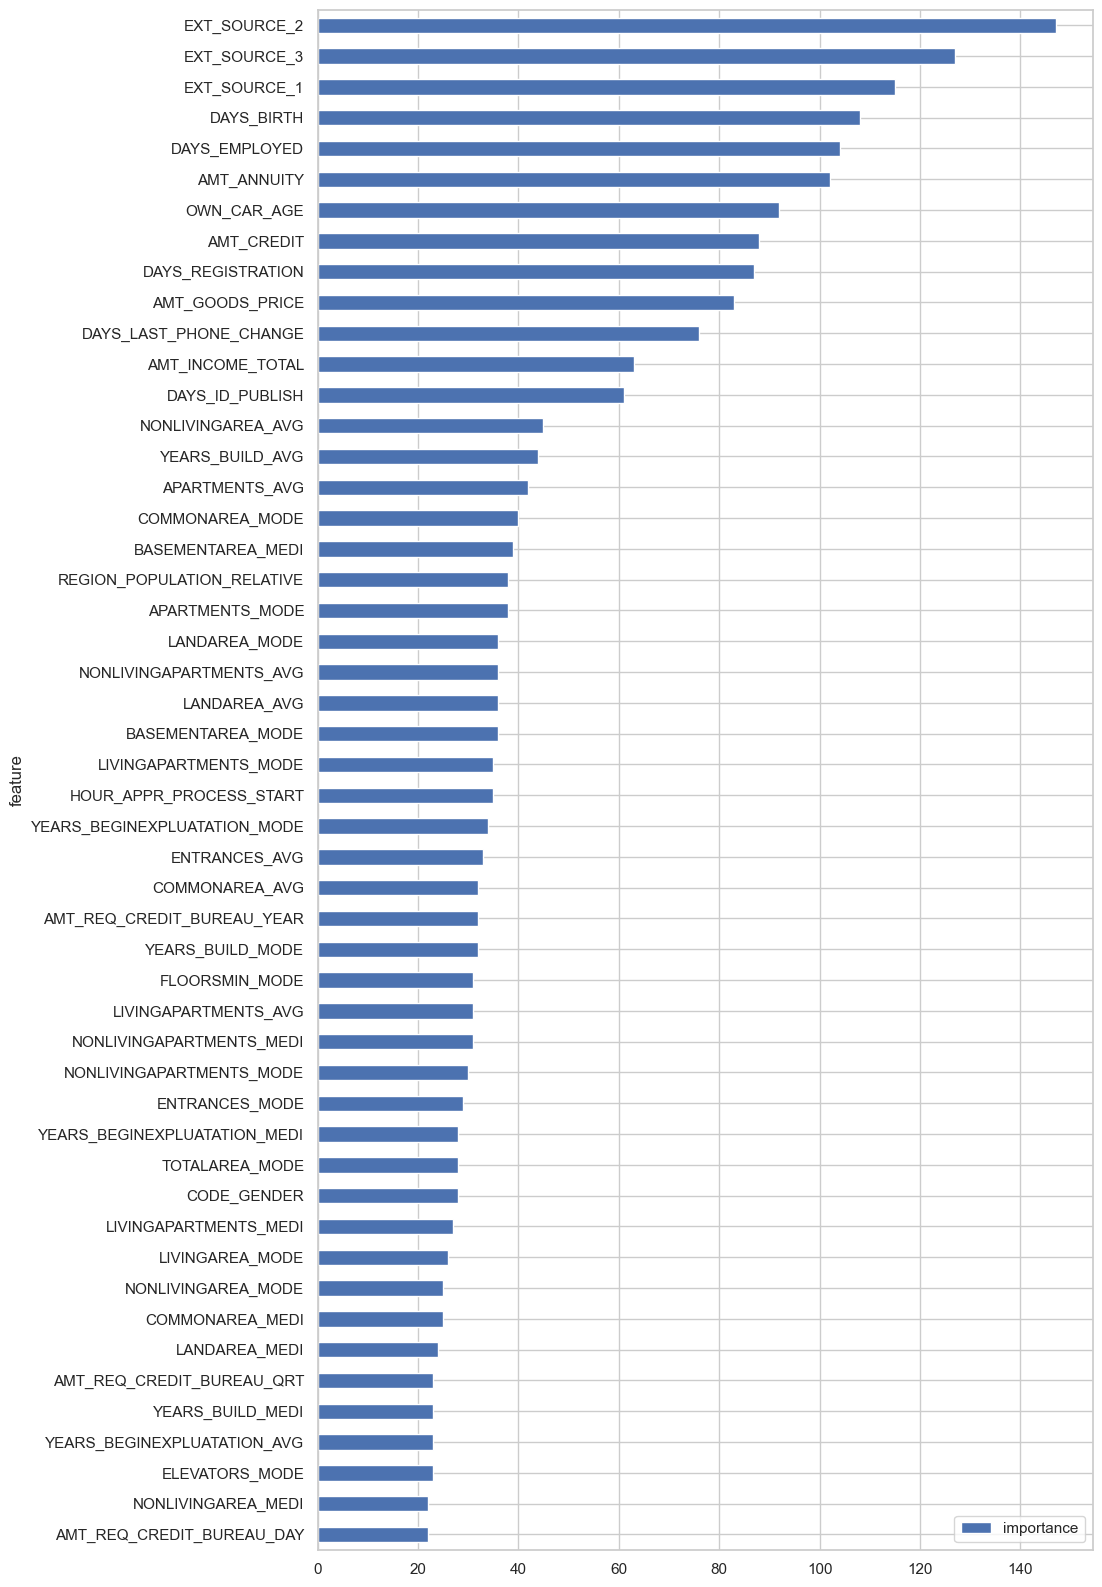

In [355]:
# Get features importance with lgbm
lgbm = pipeline.named_steps["LGBM"]
importance = lgbm.feature_importances_
feature_importance = pd.DataFrame(
    zip(all_features, importance), columns=["feature", "importance"]
)
# feature_importance["abs_coef"] = feature_importance["coef"].apply(lambda x: abs(x))
feature_importance = feature_importance.sort_values("importance", ascending=True)

top_features = feature_importance.tail(50)
# feature_importance = coef.sort_values("coef", ascending=True)
top_features.plot(x="feature", y="importance", kind="barh", figsize=(10, 20))

# Feature engineering

## Only important features

As lightGBM gives the best results so far regarding the recall score,we'll try to work on the most important features for this model.

In [369]:
from sklearn.preprocessing import MaxAbsScaler

best_features = []
for feature in top_features["feature"].unique():
    for col in X_train.columns:
        if feature.startswith(col) and col not in best_features:
            best_features.append(col)

X_train_filtered = X_train[best_features]
X_test_filtered = X_test[best_features]

print(X_train_filtered.shape)

# Redifine columns to pass to pipeline
cat_col = split_cat_col(X_train_filtered)

(53813, 50)
1 columns to process with a label encoder.
['CODE_GENDER']
0 columns to process with a one-hot encoder.
[]


In [357]:
# We redefine a column transformer
column_processor = ColumnTransformer(
    transformers=[
        ("num", num_imputer, make_column_selector(dtype_include=np.number)),
        ("cat", ordinal_pipeline, cat_col["bimodal"]),
    ],
    remainder="passthrough",
)

In [358]:
# we test on the selected features
pipeline = imbPipeline(
    steps=[
        ("preprocessor", column_processor),
        ("sample", smote),
        ("scaler", MinMaxScaler()),
        ("model", LogisticRegression()),
    ]
)

start = time.time()
pipeline.fit(X_train_filtered, y_train)
y_pred = pipeline.predict(X_test_filtered)
end = time.time()

results = display_results(
    y_test, y_pred, "Logistic Regression", "SMOTE", end - start
)
display(results)


/Users/laetitiataddei/Desktop/code/Laeti-dev/data/P4_Credit-Scoring-Model/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Logistic Regression,SMOTE,6.495086,0.684343,0.254251,0.157089,0.666488,0.676199,0.166555


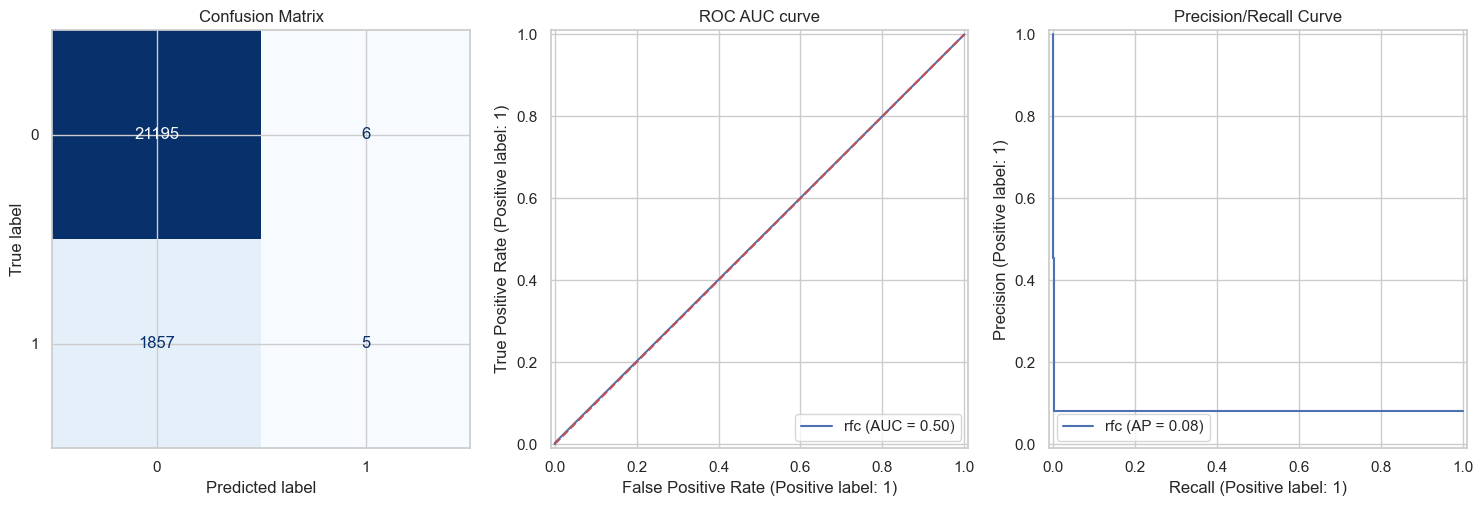

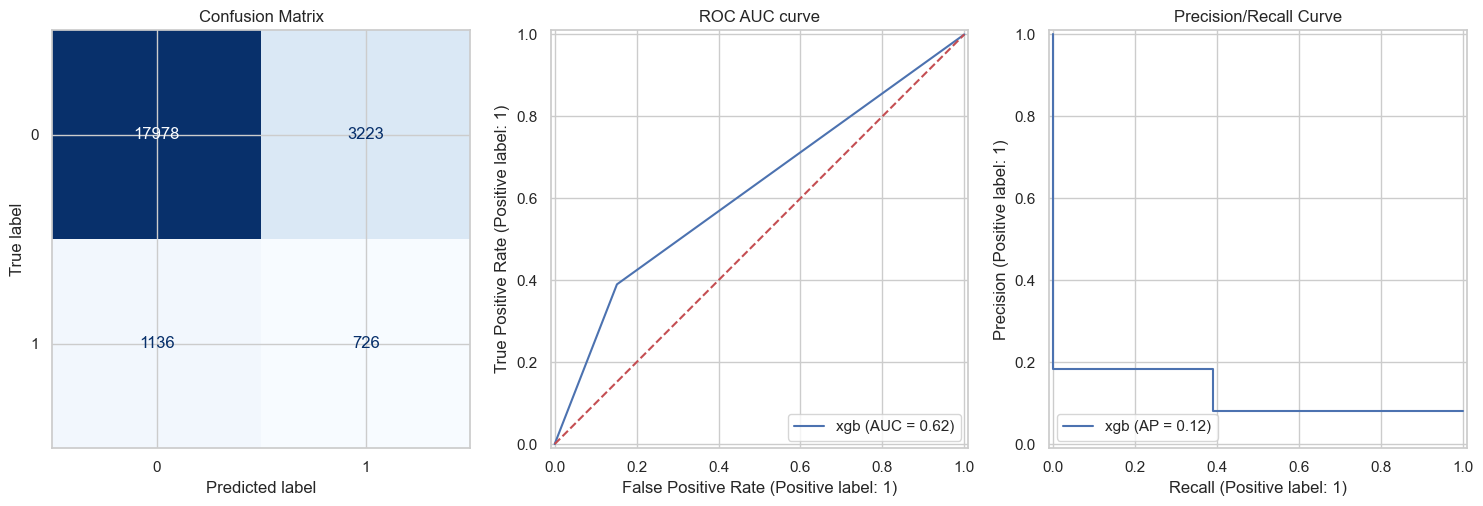

[LightGBM] [Info] Number of positive: 4344, number of negative: 49469
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12007
[LightGBM] [Info] Number of data points in the train set: 53813, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080724 -> initscore=-2.432551
[LightGBM] [Info] Start training from score -2.432551


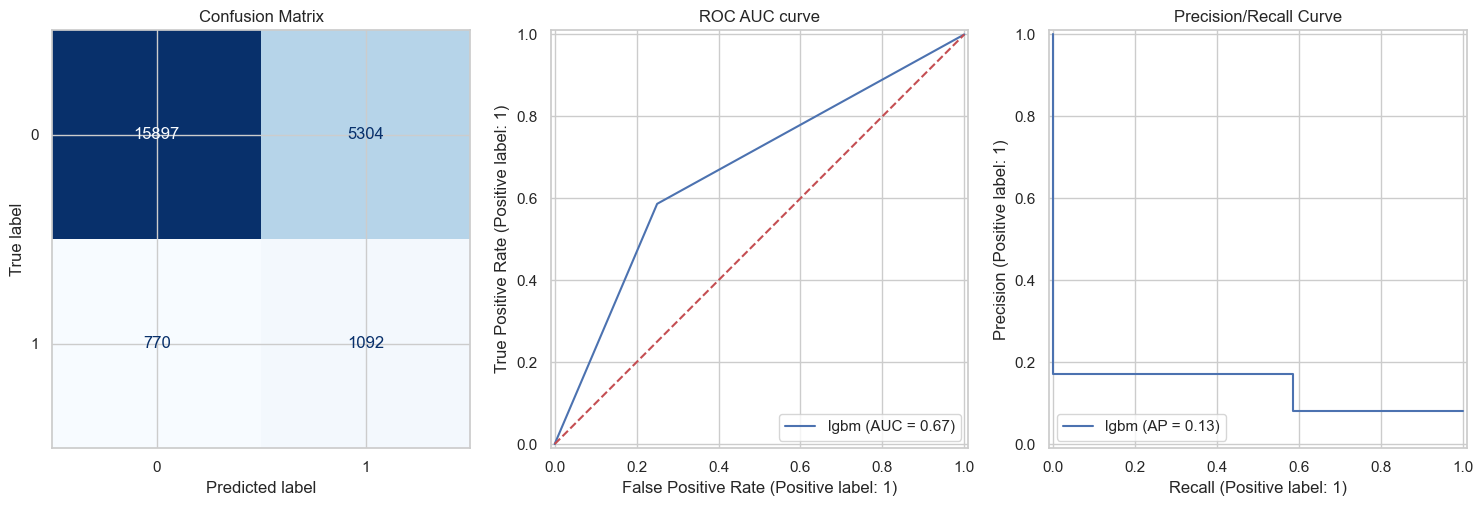

,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Logistic Regression,SMOTE,6.495086,0.684343,0.254251,0.157089,0.666488,0.676199,0.166555
1,rfc,class_weight,27.076629,0.919221,0.005339,0.454545,0.002685,0.501201,0.000269
2,xgb,class_weight,5.941328,0.810996,0.249871,0.183844,0.389903,0.618941,0.060070
3,lgbm,class_weight,5.863404,0.736634,0.264471,0.170732,0.586466,0.668145,0.124204


In [359]:
rfc = RandomForestClassifier(class_weight='balanced')
xgb = XGBClassifier(scale_pos_weight=ratio)
lgbm = LGBMClassifier(scale_pos_weight=ratio)

models = [{"rfc":rfc}, {"xgb":xgb}, {"lgbm":lgbm}]

for model in models:
    for k, v in model.items():
        pipeline = imbPipeline(
            steps=[
                ("preprocessor", column_processor),
                ("scaler", MinMaxScaler()),
                (k, v),
            ]
        )

        start = time.time()
        pipeline.fit(X_train_filtered, y_train)
        y_pred = pipeline.predict(X_test_filtered)
        end = time.time()

        results = display_results(y_test, y_pred, k, "class_weight",end - start, results=results)
        plot_metrics(y_test, y_pred, k)

display(results)

RFC is not performing with the class_weight parameter, let's try resampling models

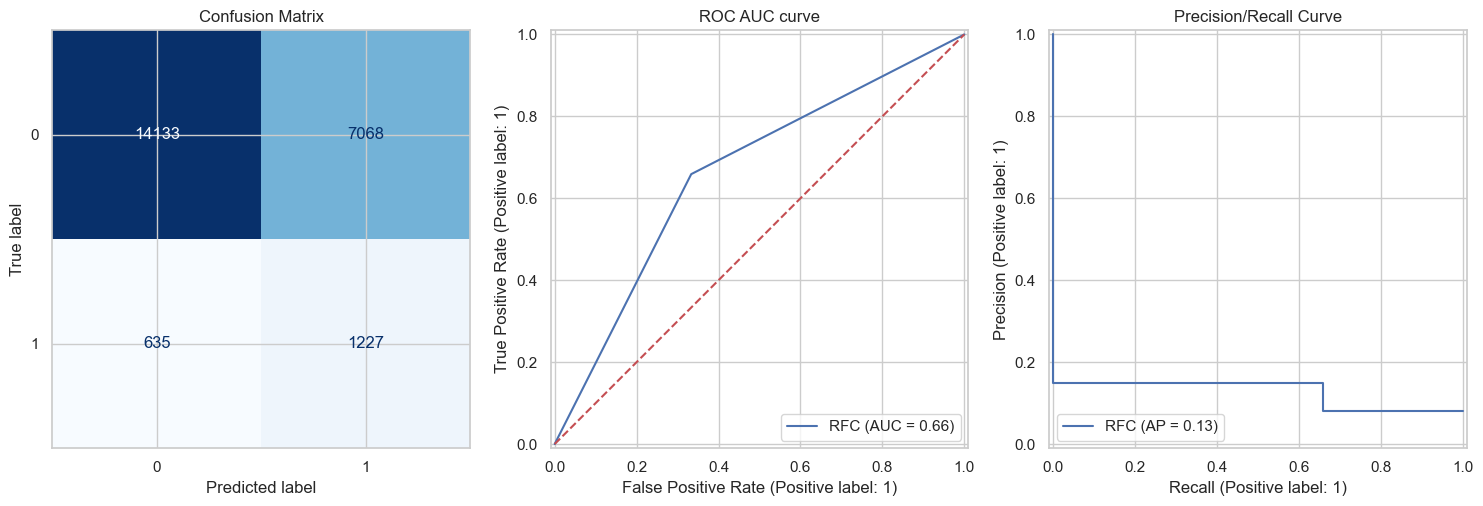

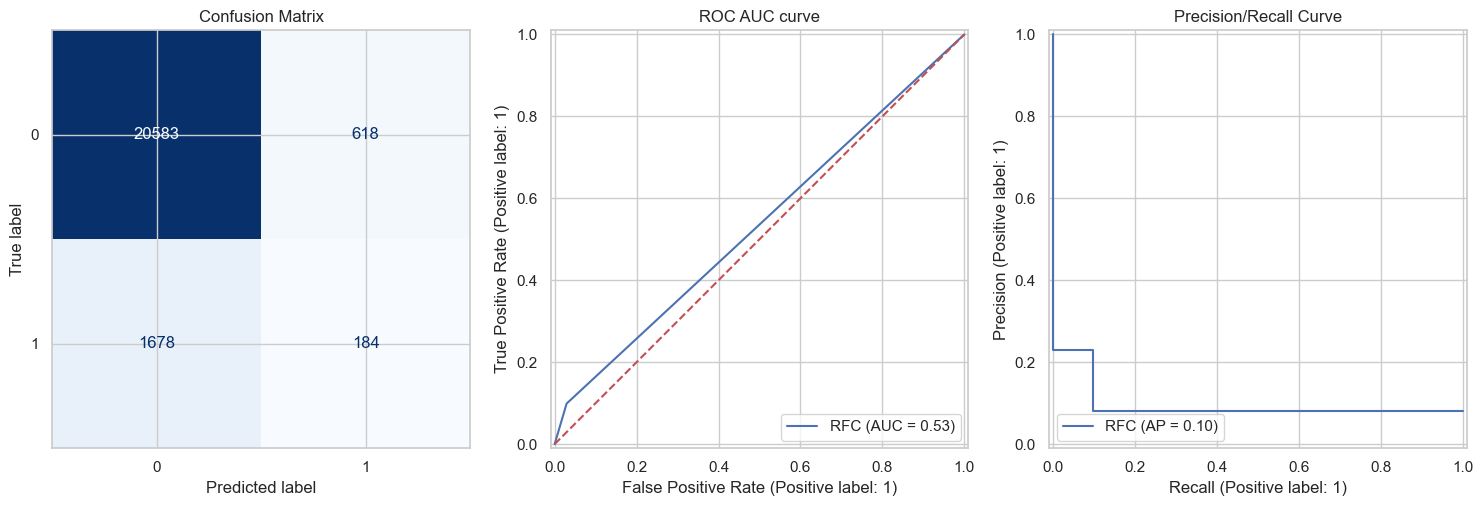

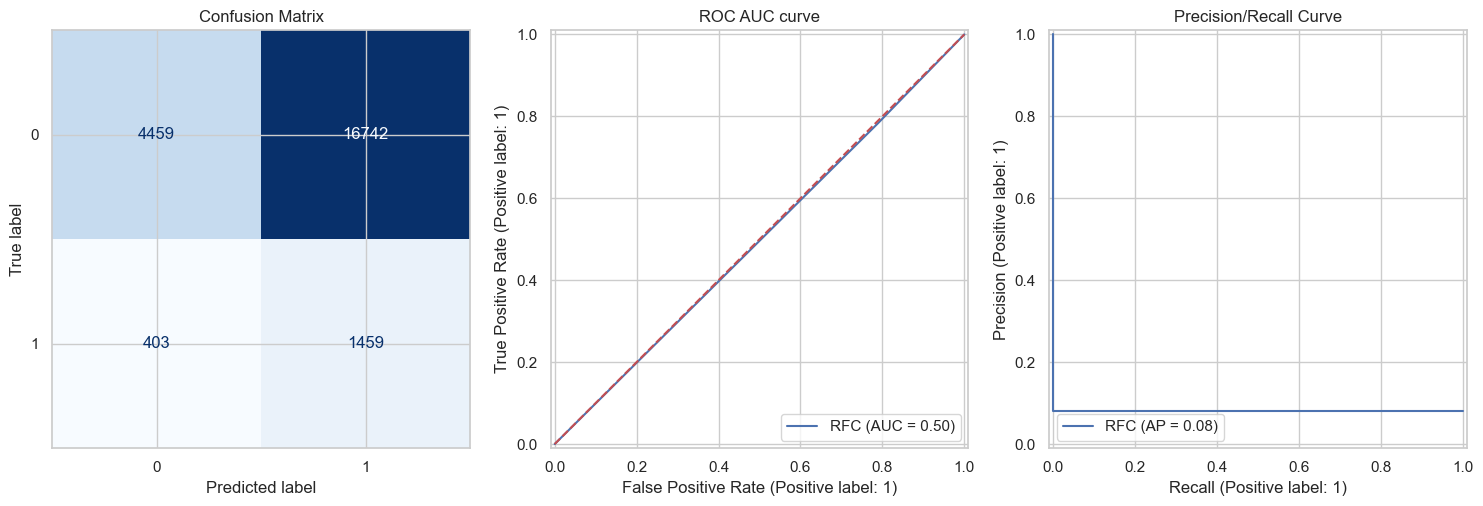

,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Logistic Regression,SMOTE,6.495086,0.684343,0.254251,0.157089,0.666488,0.676199,0.166555
1,rfc,class_weight,27.076629,0.919221,0.005339,0.454545,0.002685,0.501201,0.000269
2,xgb,class_weight,5.941328,0.810996,0.249871,0.183844,0.389903,0.618941,0.060070
3,lgbm,class_weight,5.863404,0.736634,0.264471,0.170732,0.586466,0.668145,0.124204
4,RFC,"RandomUnderSampler(random_state=42, replacemen...",9.353318,0.666002,0.241607,0.147920,0.658969,0.662794,0.161937
5,RFC,SMOTE(),60.972301,0.900447,0.138138,0.229426,0.098818,0.534834,0.010846
6,RFC,NearMiss(),10.066883,0.256601,0.145442,0.080160,0.783566,0.496943,0.265804


In [360]:
methods = [rus, smote, nm]

for method in methods:
    pipeline = imbPipeline(
        steps=[
            ("preprocessor", column_processor),
            ("scaler", MinMaxScaler()),
            ("sampler", method),
            ("model", RandomForestClassifier()),
        ]
    )

    start = time.time()
    pipeline.fit(X_train_filtered, y_train)
    y_pred = pipeline.predict(X_test_filtered)
    end = time.time()

    results = display_results(y_test, y_pred, "RFC", method, end - start, results=results)
    plot_metrics(y_test, y_pred, "RFC")

display(results)

Using RUS with RFC seems to perform quite well, let's try on the boosting technics

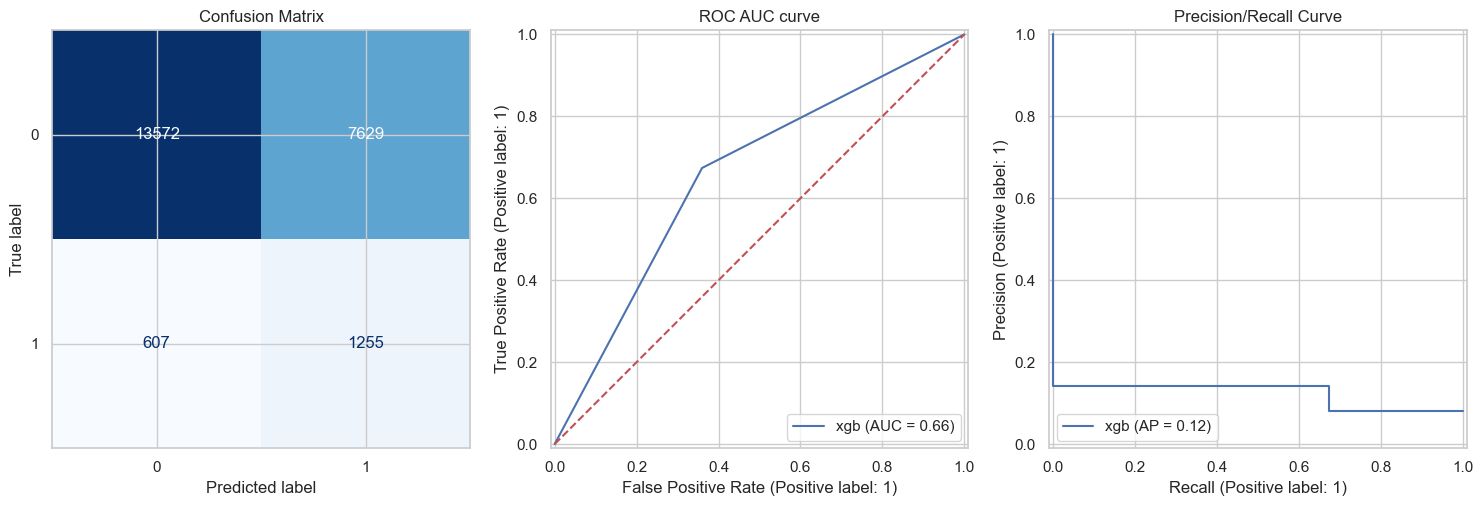

[LightGBM] [Info] Number of positive: 4344, number of negative: 4344
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11943
[LightGBM] [Info] Number of data points in the train set: 8688, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


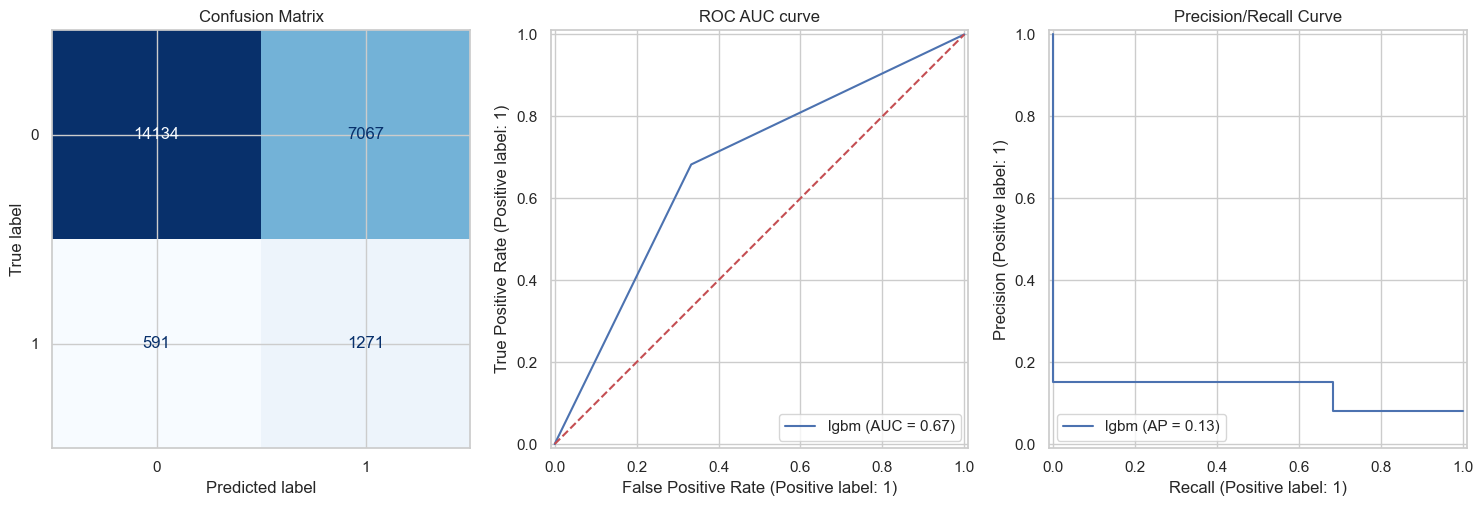

,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Logistic Regression,SMOTE,6.495086,0.684343,0.254251,0.157089,0.666488,0.676199,0.166555
1,rfc,class_weight,27.076629,0.919221,0.005339,0.454545,0.002685,0.501201,0.000269
2,xgb,class_weight,5.941328,0.810996,0.249871,0.183844,0.389903,0.618941,0.060070
3,lgbm,class_weight,5.863404,0.736634,0.264471,0.170732,0.586466,0.668145,0.124204
4,RFC,"RandomUnderSampler(random_state=42, replacemen...",9.353318,0.666002,0.241607,0.147920,0.658969,0.662794,0.161937
5,RFC,SMOTE(),60.972301,0.900447,0.138138,0.229426,0.098818,0.534834,0.010846
6,RFC,NearMiss(),10.066883,0.256601,0.145442,0.080160,0.783566,0.496943,0.265804
7,xgb,RUS,5.873087,0.642891,0.233575,0.141265,0.674006,0.657082,0.171331
8,lgbm,RUS,5.536642,0.667953,0.249216,0.152435,0.682599,0.674633,0.176995


In [361]:
models = [{"xgb":XGBClassifier()}, {"lgbm":LGBMClassifier()}]

for model in models:
    for k, v in model.items():
        pipeline = imbPipeline(
            steps=[
                ("preprocessor", column_processor),
                ("scaler", MinMaxScaler()),
                ("RUS", rus),
                (k, v),
            ]
        )

        start = time.time()
        pipeline.fit(X_train_filtered, y_train)
        y_pred = pipeline.predict(X_test_filtered)
        end = time.time()

        plot_metrics(y_test, y_pred, k)
        results = display_results(y_test, y_pred, k, "RUS", end - start, results=results)
display(results)

Before going further, let's try on a different sample.

In [362]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    sample_2.drop(columns=["TARGET", "SK_ID_CURR"]),
    sample_2["TARGET"],
    train_size=0.3,
    stratify=sample_2["TARGET"],
    random_state=19,
)

X_train2.shape


(23063, 121)

In [363]:
cat_col2 = split_cat_col(X_train2)

4 columns to process with a label encoder.
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
12 columns to process with a one-hot encoder.
['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [364]:
col_processor = ColumnTransformer(
    transformers=[
        ("num", num_imputer, make_column_selector(dtype_include=np.number)),
        ("ordinal", ordinal_pipeline, cat_col2["bimodal"]),
        ("one_hot", one_hot_pipeline, cat_col2["multimodal"]),
    ],
    remainder="passthrough",
)

In [367]:
lg_pipeline = imbPipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("sampling", smote),
        ("logistic", logistic_model),
    ]
)

start = time.time()
lg_pipeline.fit(X_train2, y_train2)
# features_name
features_name = (
    lg_pipeline.named_steps["preprocessor"]
    .transformers_[2][1]
    .named_steps["encoder"]
    .get_feature_names_out()
)
simple_lg_coef = lg.coef_[0]

lg_y_pred = lg_pipeline.predict(X_test2)
end = time.time()


results = display_results(
    y_test2, lg_y_pred, "Logistic Regression", "SMOTE", end - start
)
display(results)


,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Logistic Regression,SMOTE,21.476074,0.697179,0.252614,0.157732,0.633978,0.668353,0.147636


No much differences

## Add some features

In [374]:
X_train_domain = X_train_filtered.copy()
X_test_domain = X_test_filtered.copy()

# Ratio of credit amount compared to income
X_train_domain["CREDIT_INCOME_PERCENT"] = (
    X_train_domain["AMT_CREDIT"] / X_train_domain["AMT_INCOME_TOTAL"]
)
X_test_domain["CREDIT_INCOME_PERCENT"] = (
    X_test_domain["AMT_CREDIT"] / X_test_domain["AMT_INCOME_TOTAL"]
)

# Ratio of annuity amount compared to income
X_train_domain["ANNUITY_INCOME_PERCENT"] = (
    X_train_domain["AMT_ANNUITY"] / X_train_domain["AMT_INCOME_TOTAL"]
)
X_test_domain["ANNUITY_INCOME_PERCENT"] = (
    X_test_domain["AMT_ANNUITY"] / X_test_domain["AMT_INCOME_TOTAL"]
)

# Ratio of credit amount compared to annuity amount
X_train_domain["CREDIT_TERM"] = (
    X_train_domain["AMT_ANNUITY"] / X_train_domain["AMT_CREDIT"]
)
X_test_domain["CREDIT_TERM"] = (
    X_test_domain["AMT_ANNUITY"] / X_test_domain["AMT_CREDIT"]
)

# The ratio of days work in a life
X_train_domain["DAYS_EMPLOYED_PERCENT"] = (
    X_train_domain["DAYS_EMPLOYED"] / X_train_domain["DAYS_BIRTH"]
)
X_test_domain["DAYS_EMPLOYED_PERCENT"] = (
    X_test_domain["DAYS_EMPLOYED"] / X_test_domain["DAYS_BIRTH"]
)


In [373]:
col_processor= ColumnTransformer(
    transformers=[
        ("num", num_imputer, make_column_selector(dtype_include=np.number)),
        ("ordinal", ordinal_pipeline, cat_col["bimodal"]),
    ],
    remainder="passthrough",
)

In [376]:
pipeline = imbPipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("sampler", smote),
        ("model", LogisticRegression()),
    ]
)

start = time.time()
pipeline.fit(X_train_domain, y_train)
y_pred = pipeline.predict(X_test_domain)
end = time.time()

results_add_features = display_results(y_test, y_pred, "Logistic Regression", "SMOTE", end - start)
display(results_add_features)

/Users/laetitiataddei/Desktop/code/Laeti-dev/data/P4_Credit-Scoring-Model/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Logistic Regression,SMOTE,7.576243,0.683909,0.253838,0.156803,0.665951,0.675719,0.16622


In [377]:
pipeline = imbPipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("sampler", rus),
        ("model", LGBMClassifier()),
    ]
)

start = time.time()
pipeline.fit(X_train_domain, y_train)
y_pred = pipeline.predict(X_test_domain)
end = time.time()

results_add_features = display_results(
    y_test, y_pred, "LGB", "RUS", end - start, results_add_features
)
display(results_add_features)


[LightGBM] [Info] Number of positive: 4344, number of negative: 4344
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12963
[LightGBM] [Info] Number of data points in the train set: 8688, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Logistic Regression,SMOTE,7.576243,0.683909,0.253838,0.156803,0.665951,0.675719,0.166220
1,LGB,RUS,7.153564,0.667996,0.252319,0.154195,0.693878,0.679800,0.184783


In [378]:
pipeline = imbPipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("sampler", rus),
        ("model", RandomForestClassifier()),
    ]
)

start = time.time()
pipeline.fit(X_train_domain, y_train)
y_pred = pipeline.predict(X_test_domain)
end = time.time()

results_add_features = display_results(
    y_test, y_pred, "RFC", "RUS", end - start, results_add_features
)
display(results_add_features)


,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Logistic Regression,SMOTE,7.576243,0.683909,0.253838,0.156803,0.665951,0.675719,0.166220
1,LGB,RUS,7.153564,0.667996,0.252319,0.154195,0.693878,0.679800,0.184783
2,RFC,RUS,10.222879,0.668603,0.244987,0.150103,0.665951,0.667393,0.166220


In [379]:
pipeline = imbPipeline(
    steps=[
        ("preprocessor", col_processor),
        ("scaler", MinMaxScaler()),
        ("sampler", rus),
        ("model", XGBClassifier()),
    ]
)

start = time.time()
pipeline.fit(X_train_domain, y_train)
y_pred = pipeline.predict(X_test_domain)
end = time.time()

results_add_features = display_results(
    y_test, y_pred, "XGB", "RUS", end - start, results_add_features
)
display(results_add_features)

,Model,Strategy,Time,Accuracy,F1,Precision,Recall,ROC AUC,Custom
0,Logistic Regression,SMOTE,7.576243,0.683909,0.253838,0.156803,0.665951,0.675719,0.166220
1,LGB,RUS,7.153564,0.667996,0.252319,0.154195,0.693878,0.679800,0.184783
2,RFC,RUS,10.222879,0.668603,0.244987,0.150103,0.665951,0.667393,0.166220
3,XGB,RUS,6.983149,0.642848,0.231551,0.140115,0.666488,0.653630,0.166555


# Hypertuning